In [2]:
import pymysql.cursors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import connect_to_db as cn

In [145]:
def draw_boxplot(result_list, title):
    filename = title + '.png'
    
    plt.rcParams['figure.figsize'] = [20, 15]
    xlabel = ['is_1', 'is_2', 'is_3', 'es_1', 'es_2', 'es_3']

    plt.boxplot(result_list)
    plt.xticks([1, 2, 3, 4, 5, 6], xlabel, fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel('score(vote)', fontsize=16)
    plt.yscale('log')
    plt.title(title, fontsize=30)
    
    plt.savefig(filename, dpi=300)
    
    plt.show()

In [90]:
def draw_boxplot_for_hub(result_list, title, xlabel, ylabel):
    filename = title + '.png'
    
    plt.rcParams['figure.figsize'] = [30, 20]

    plt.boxplot(result_list)
    plt.xticks([1, 2, 3, 4, 5, 6], xlabel, fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.yscale('log')
    plt.title(title, fontsize=30)
    
    plt.savefig(filename, dpi=300)
    
    plt.show()

In [4]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors1 = []
sqls1 = []
results1 = []
result_list1 = []
for i in range(6):
    cursors1.append(connection.cursor(pymysql.cursors.DictCursor))

sqls1.append('select score from comments where is_score = 1;')
sqls1.append('select score from comments where is_score = 2;')
sqls1.append('select score from comments where is_score = 3;')
sqls1.append('select score from comments where es_score = 1;')
sqls1.append('select score from comments where es_score = 2;')
sqls1.append('select score from comments where es_score = 3;')

for i in range(6):
    cursors1[i].execute(sqls1[i])
    # result가 dict 형태로 return.
    results1.append(cursors1[i].fetchall())

connection.close()

for i in range(6):
    results1[i] = pd.DataFrame(results1[i])
    result_list1.append(list(np.array(results1[i]['score'].tolist())))

KeyboardInterrupt: 

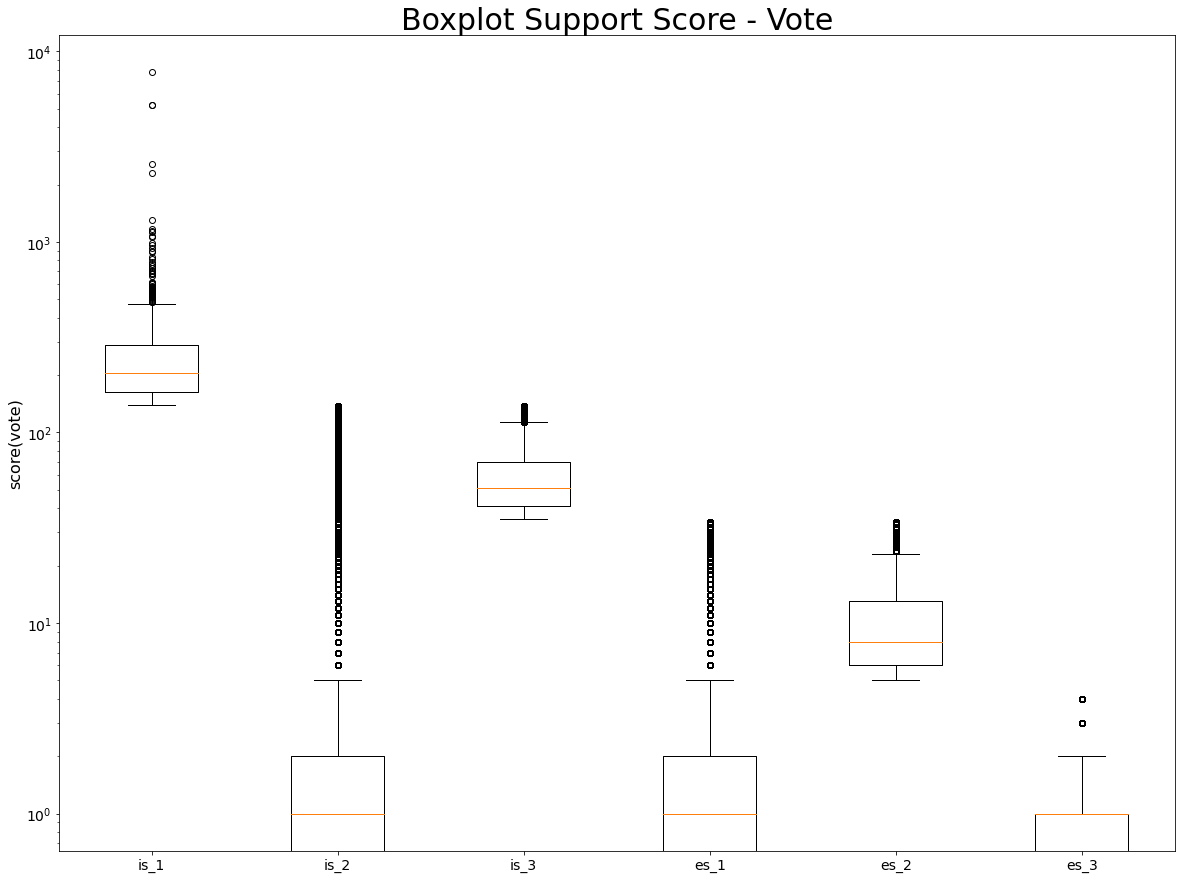

In [146]:
draw_boxplot(result_list1, "Boxplot Support Score - Vote")

In [6]:
connection = cn.make_connection('connection.csv')

cursors2 = []
sqls2 = []
results2 = []
result_list2 = []
for i in range(6):
    cursors2.append(connection.cursor(pymysql.cursors.DictCursor))
    
where = "author not in ('greatyellowshark', 'gurneyhallack', 'aristapop', 'Pi25', 'SeriousSamStone', 'Umbresp', 'CUTIEJUDY', 'Imissmemom', 'aagee', 'noonches', 'Vientodecara', 'Jolojil', 'sciential84', 'AmazonPriceBot', 'AmputatorBot', 'AntiObnoxiousBot', 'ClickableLinkBot', 'converter-bot', 'CoolDownBot', 'FakespotAnalysisBot', 'HappyCakeBot', 'hotlinehelpbot', 'lerobinbot', 'LimbRetrieval-Bot', 'LinkifyBot', 'NoGoogleAMPBot', 'oofed-bot', 'PORTMANTEAU-BOT', 'Reddit-Book-Bot', 'remindditbot', 'RemindMeBot', 'RepostSleuthBot', 'RossGellerBot', 'sneakpeekbot', 'the_timezone_bot', 'timee_bot', 'tiny_smile_bot', 'TitleLinkHelperBot', 'wikipedia_answer_bot', ' wikipedia_text_bot', 'WikiTextBot', 'YoMommaJokeBot', '', 'AutoModerator');"

sqls2.append("select score from comments where is_score = 1 and " + where)
sqls2.append("select score from comments where is_score = 2 and " + where)
sqls2.append("select score from comments where is_score = 3 and " + where)
sqls2.append("select score from comments where es_score = 1 and " + where)
sqls2.append("select score from comments where es_score = 2 and " + where)
sqls2.append("select score from comments where es_score = 3 and " + where)

for i in range(6):
    cursors2[i].execute(sqls2[i])
    # result가 dict 형태로 return.
    results2.append(cursors2[i].fetchall())

connection.close()

for i in range(6):
    results2[i] = pd.DataFrame(results2[i])
    result_list2.append(list(np.array(results2[i]['score'].tolist())))

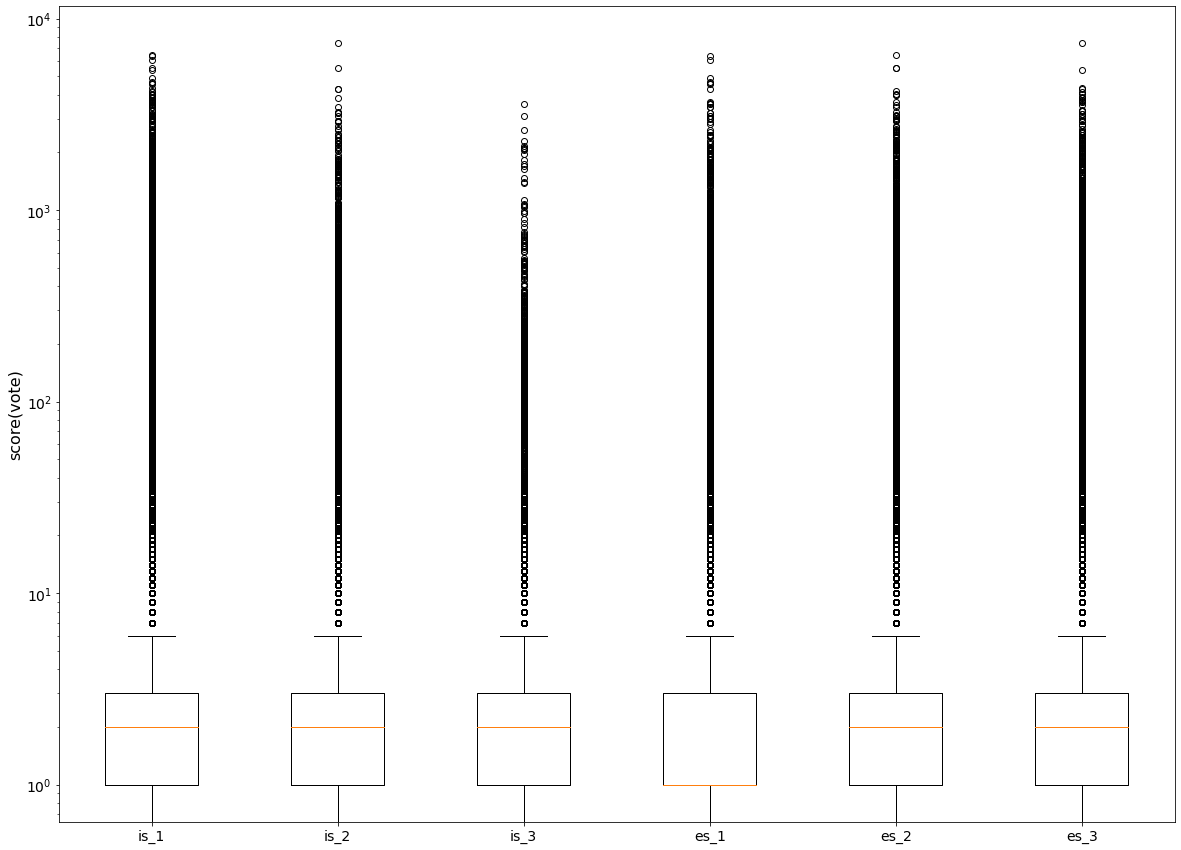

In [7]:
draw_boxplot(result_list2, "Boxplot Support Score - Vote (without all blank, moderators, bots)")

In [10]:
connection = cn.make_connection('connection.csv')

cursors3 = []
sqls3 = []
results3 = []
result_list3 = []
for i in range(6):
    cursors3.append(connection.cursor(pymysql.cursors.DictCursor))

where = "author not in ('greatyellowshark', 'gurneyhallack', 'aristapop', 'Pi25', 'SeriousSamStone', 'Umbresp', 'CUTIEJUDY', 'Imissmemom', 'aagee', 'noonches', 'Vientodecara', 'Jolojil', 'sciential84', 'AmazonPriceBot', 'AmputatorBot', 'AntiObnoxiousBot', 'ClickableLinkBot', 'converter-bot', 'CoolDownBot', 'FakespotAnalysisBot', 'HappyCakeBot', 'hotlinehelpbot', 'lerobinbot', 'LimbRetrieval-Bot', 'LinkifyBot', 'NoGoogleAMPBot', 'oofed-bot', 'PORTMANTEAU-BOT', 'Reddit-Book-Bot', 'remindditbot', 'RemindMeBot', 'RepostSleuthBot', 'RossGellerBot', 'sneakpeekbot', 'the_timezone_bot', 'timee_bot', 'tiny_smile_bot', 'TitleLinkHelperBot', 'wikipedia_answer_bot', ' wikipedia_text_bot', 'WikiTextBot', 'YoMommaJokeBot', '', 'AutoModerator', 'gurneyhallack', 'remyschnitzel', 'analemmaro', 'spud_simon_salem', 'one_moody_girl', 'VivaSisyphus', 'apparentlycompetent', 'zooline', 'yellowmix', 'TheYellowRose', 'Svataben', 'SQLwitch', 'circinia', 'sofar1776', 'Takei_Me');"

sqls3.append("select score from comments where is_score = 1 and " + where)
sqls3.append("select score from comments where is_score = 2 and " + where)
sqls3.append("select score from comments where is_score = 3 and " + where)
sqls3.append("select score from comments where es_score = 1 and " + where)
sqls3.append("select score from comments where es_score = 2 and " + where)
sqls3.append("select score from comments where es_score = 3 and " + where)

for i in range(6):
    cursors3[i].execute(sqls3[i])
    # result가 dict 형태로 return.
    results3.append(cursors3[i].fetchall())

connection.close()

for i in range(6):
    results3[i] = pd.DataFrame(results3[i])
    result_list3.append(list(np.array(results3[i]['score'].tolist())))

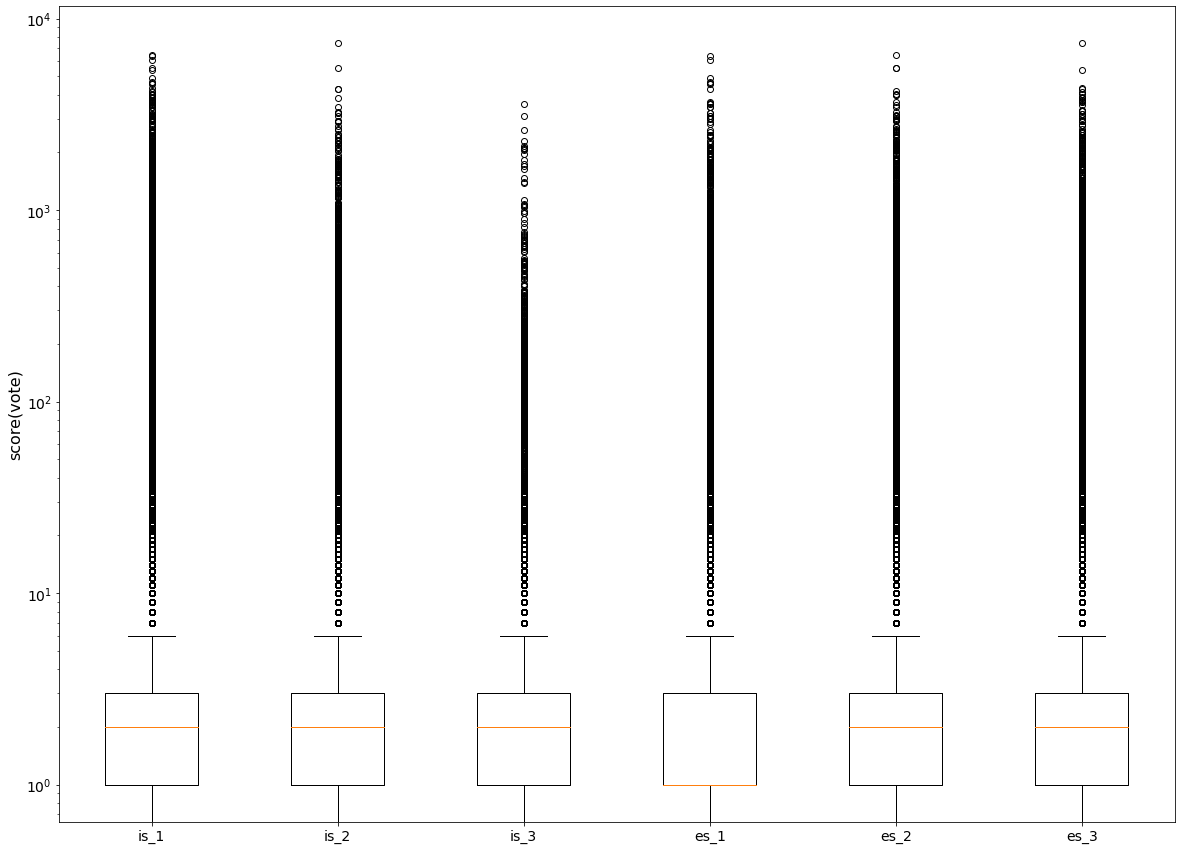

In [11]:
draw_boxplot(result_list3, "Boxplot Support Score - Vote (without ALL Moderators, Bots)")

In [143]:
connection = cn.make_connection('connection.csv')

cursors3 = []
sqls3 = []
results3 = []
result_list3 = []
for i in range(6):
    cursors3.append(connection.cursor(pymysql.cursors.DictCursor))

sqls3.append("select score from comments where is_score = 1 and is_valid_author=1 and is_valid=1;")
sqls3.append("select score from comments where is_score = 2 and is_valid_author=1 and is_valid=1;")
sqls3.append("select score from comments where is_score = 3 and is_valid_author=1 and is_valid=1;")
sqls3.append("select score from comments where es_score = 1 and is_valid_author=1 and is_valid=1;")
sqls3.append("select score from comments where es_score = 2 and is_valid_author=1 and is_valid=1;")
sqls3.append("select score from comments where es_score = 3 and is_valid_author=1 and is_valid=1;")

for i in range(6):
    cursors3[i].execute(sqls3[i])
    # result가 dict 형태로 return.
    results3.append(cursors3[i].fetchall())

connection.close()

for i in range(6):
    results3[i] = pd.DataFrame(results3[i])
    result_list3.append(list(np.array(results3[i]['score'].tolist())))

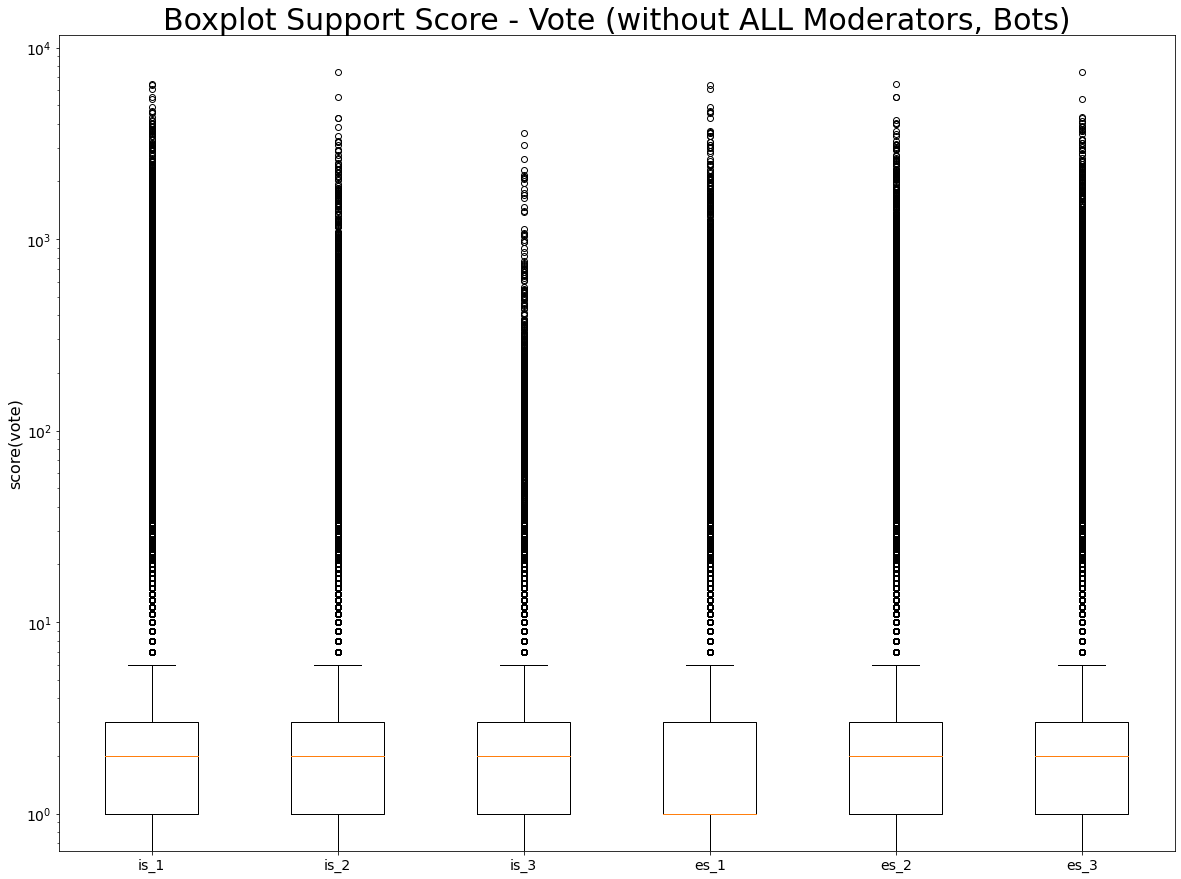

In [147]:
draw_boxplot(result_list3, "Boxplot Support Score - Vote (without ALL Moderators, Bots)")

In [106]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select outdegree from nodes where top_k_outdegree = 0.1;')
sqls.append('select outdegree from nodes where top_k_outdegree > 0.1;')
sqls.append('select outdegree from nodes where top_k_outdegree <= 1;')
sqls.append('select outdegree from nodes where top_k_outdegree > 1;')
sqls.append('select outdegree from nodes where top_k_outdegree <= 10;')
sqls.append('select outdegree from nodes where top_k_outdegree > 10;')

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    result_list.append(list(np.array(results[i]['outdegree'].tolist())))

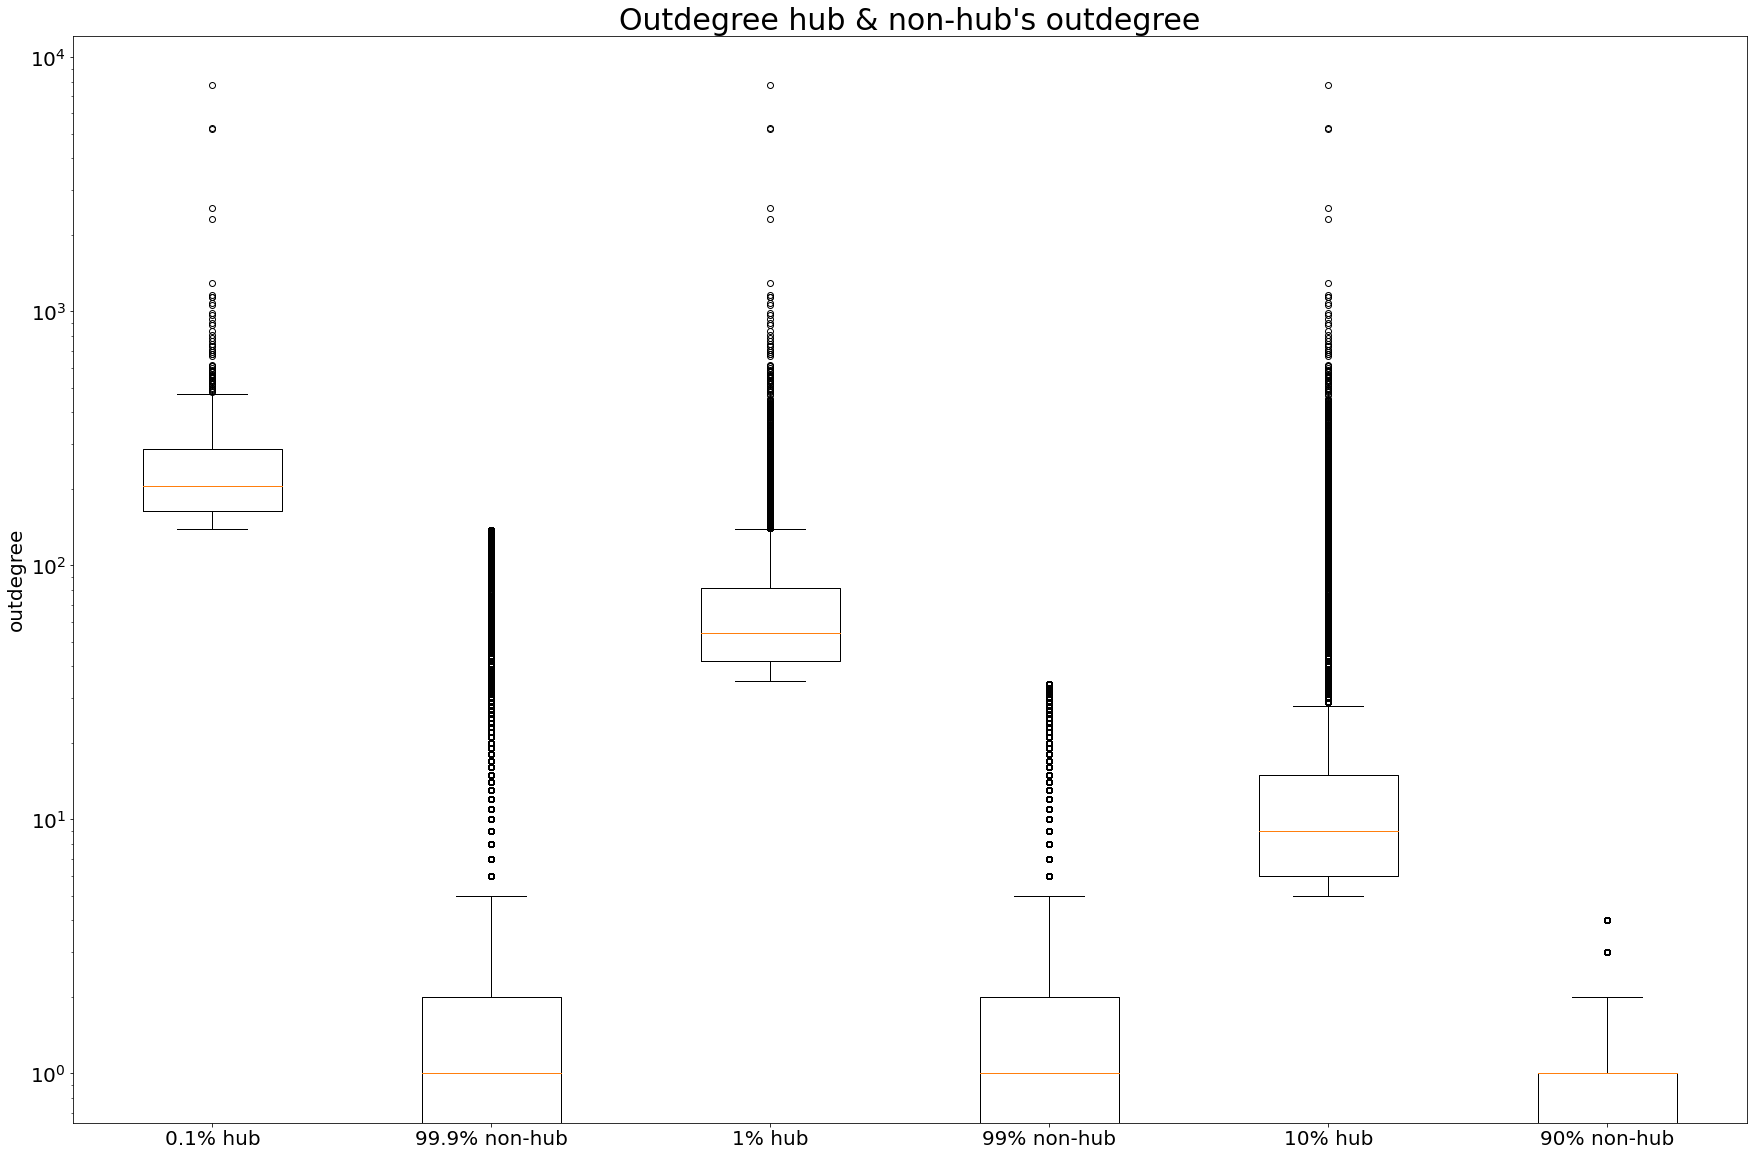

In [107]:
xlabel = ['0.1% hub', '99.9% non-hub', '1% hub', '99% non-hub', '10% hub', '90% non-hub']
draw_boxplot_for_hub(result_list, "Outdegree hub & non-hub's outdegree", xlabel, 'outdegree')

In [108]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select indegree from nodes where top_k_outdegree = 0.1;')
sqls.append('select indegree from nodes where top_k_outdegree > 0.1;')
sqls.append('select indegree from nodes where top_k_outdegree <= 1;')
sqls.append('select indegree from nodes where top_k_outdegree > 1;')
sqls.append('select indegree from nodes where top_k_outdegree <= 10;')
sqls.append('select indegree from nodes where top_k_outdegree > 10;')

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    result_list.append(list(np.array(results[i]['indegree'].tolist())))

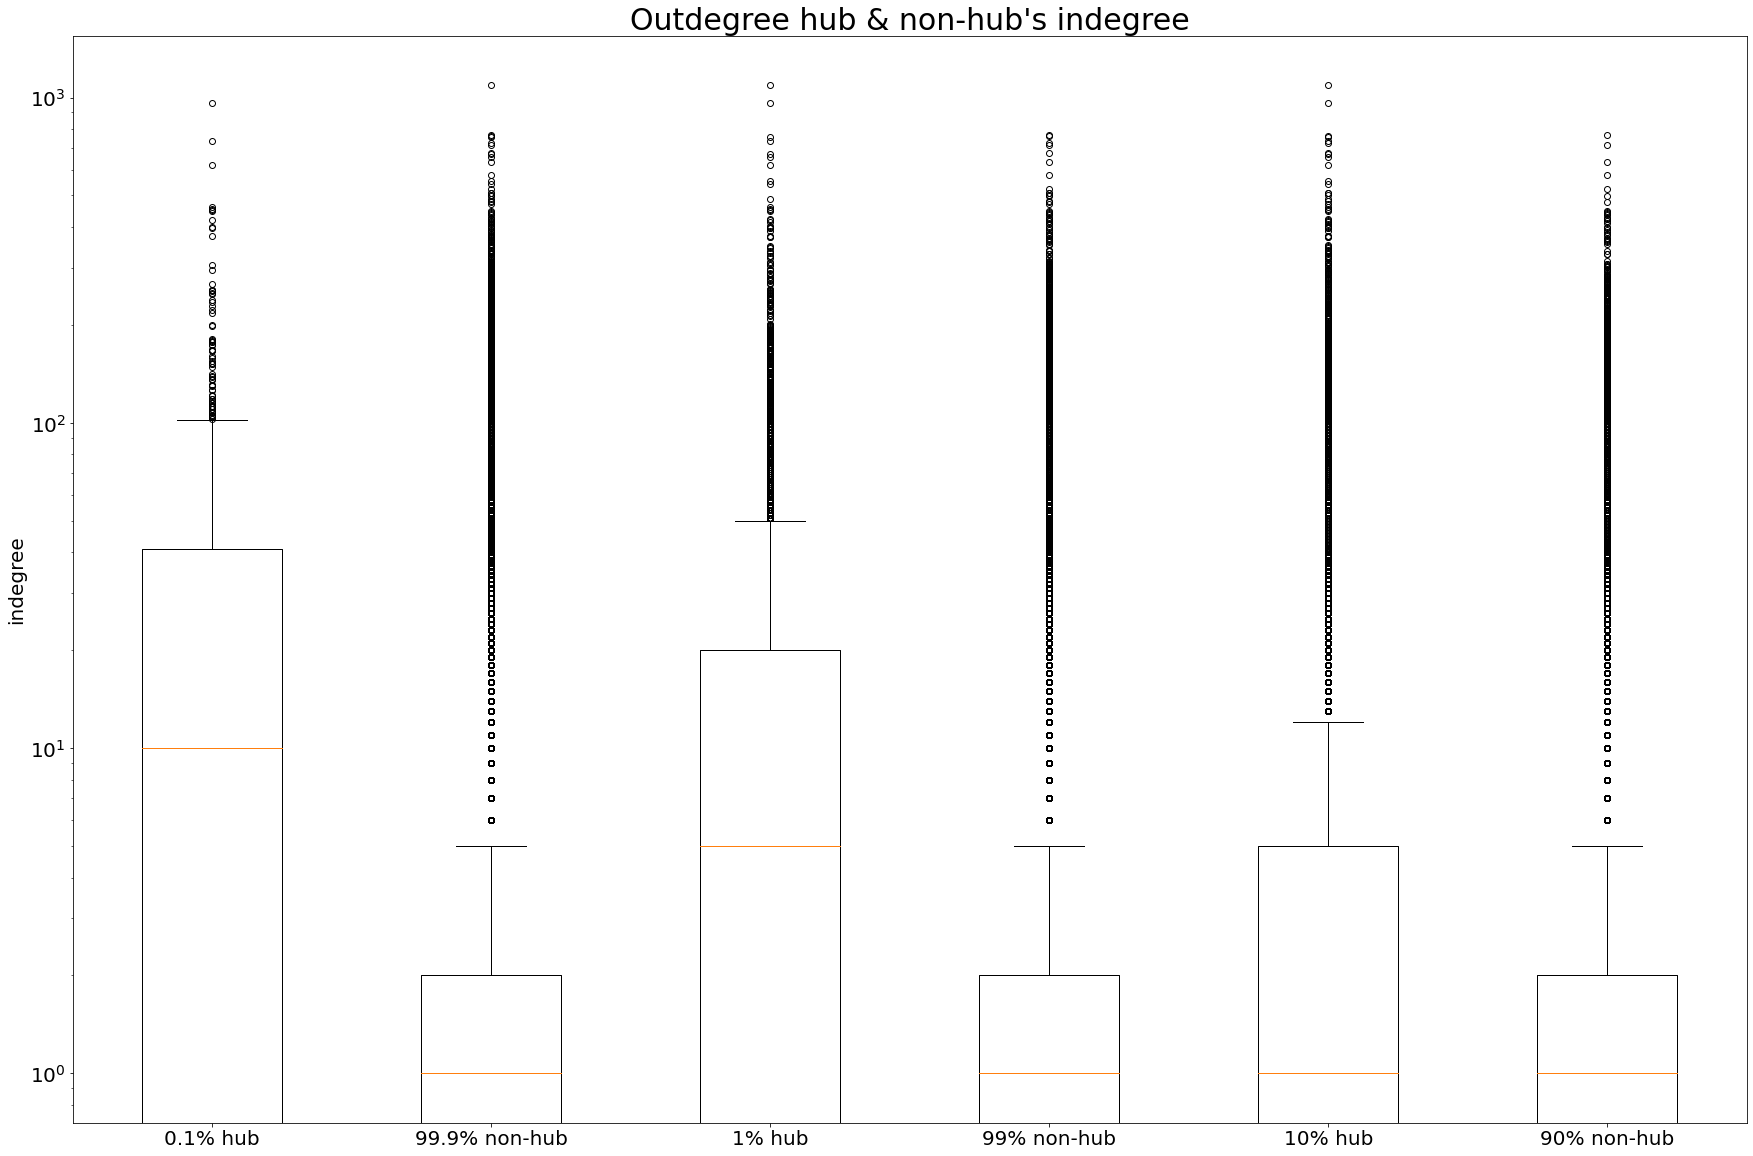

In [109]:
draw_boxplot_for_hub(result_list, "Outdegree hub & non-hub's indegree", xlabel, 'indegree')

In [110]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.posts_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree = 0.1 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 0.1 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 1 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 1 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 10 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 10 and m.posts_similarity is not null;')

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['posts_similarity'].tolist())))

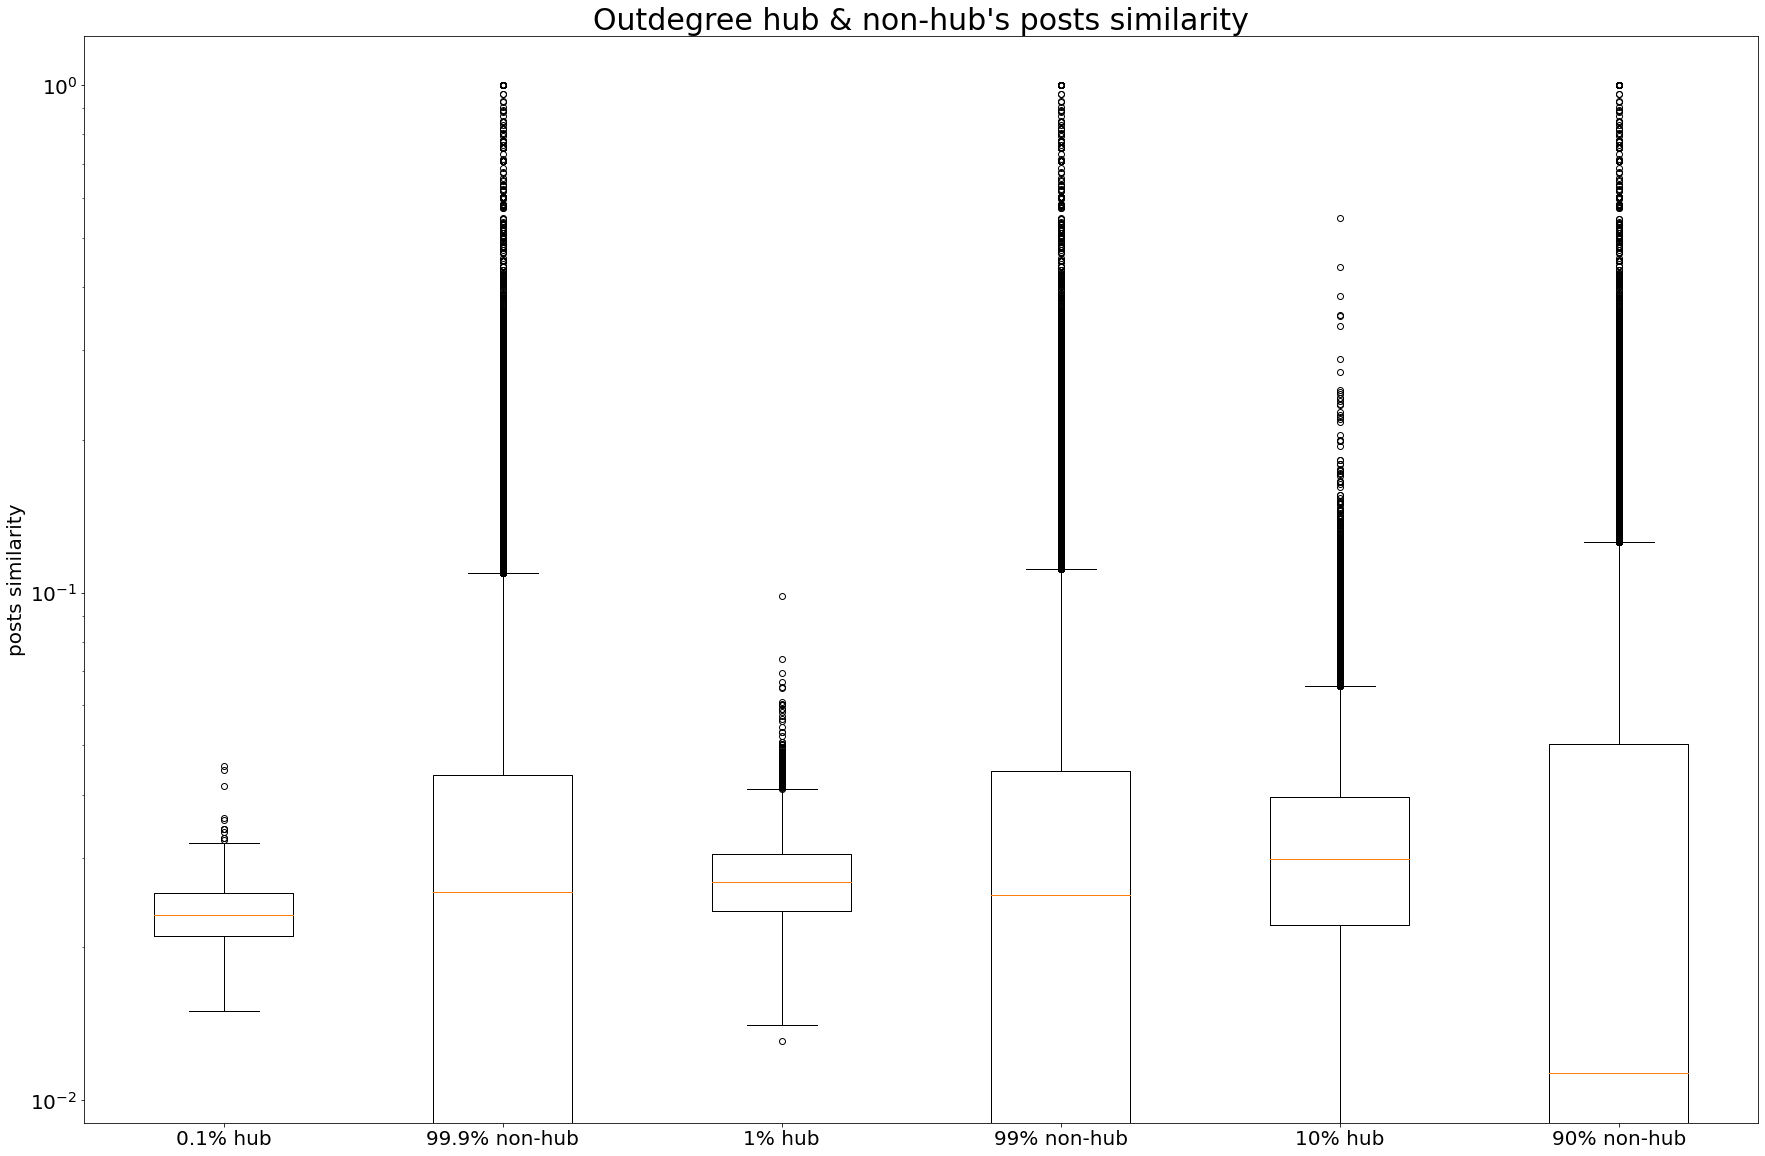

In [111]:
draw_boxplot_for_hub(result_list, "Outdegree hub & non-hub's posts similarity", xlabel, 'posts similarity')

In [112]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.comments_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree = 0.1 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 0.1 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 1 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 1 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 10 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 10 and m.comments_similarity is not null;')

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['comments_similarity'].tolist())))

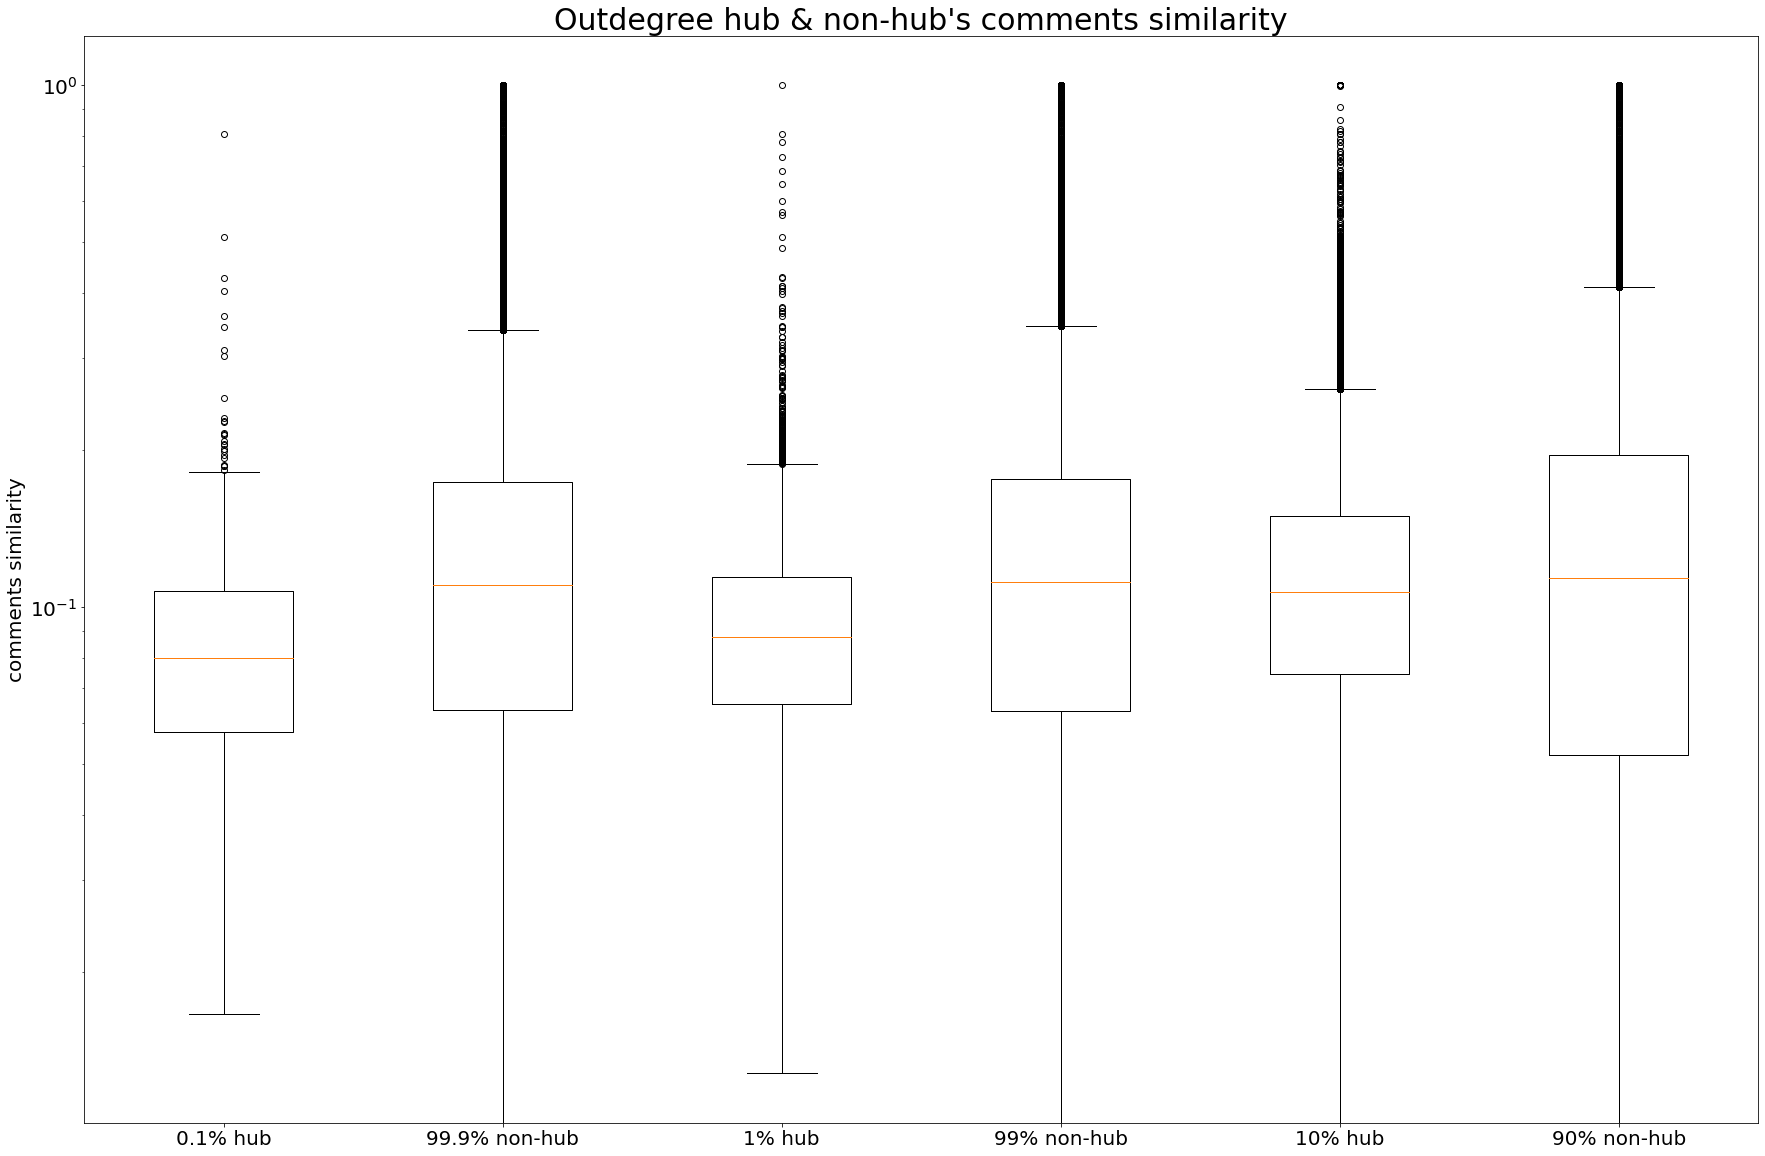

In [113]:
draw_boxplot_for_hub(result_list, "Outdegree hub & non-hub's comments similarity", xlabel, 'comments similarity')

In [114]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree = 0.1;')
sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 0.1;')
sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 1;')
sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 1;')
sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 10;')
sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 10;')

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['average_is_score'].tolist())))

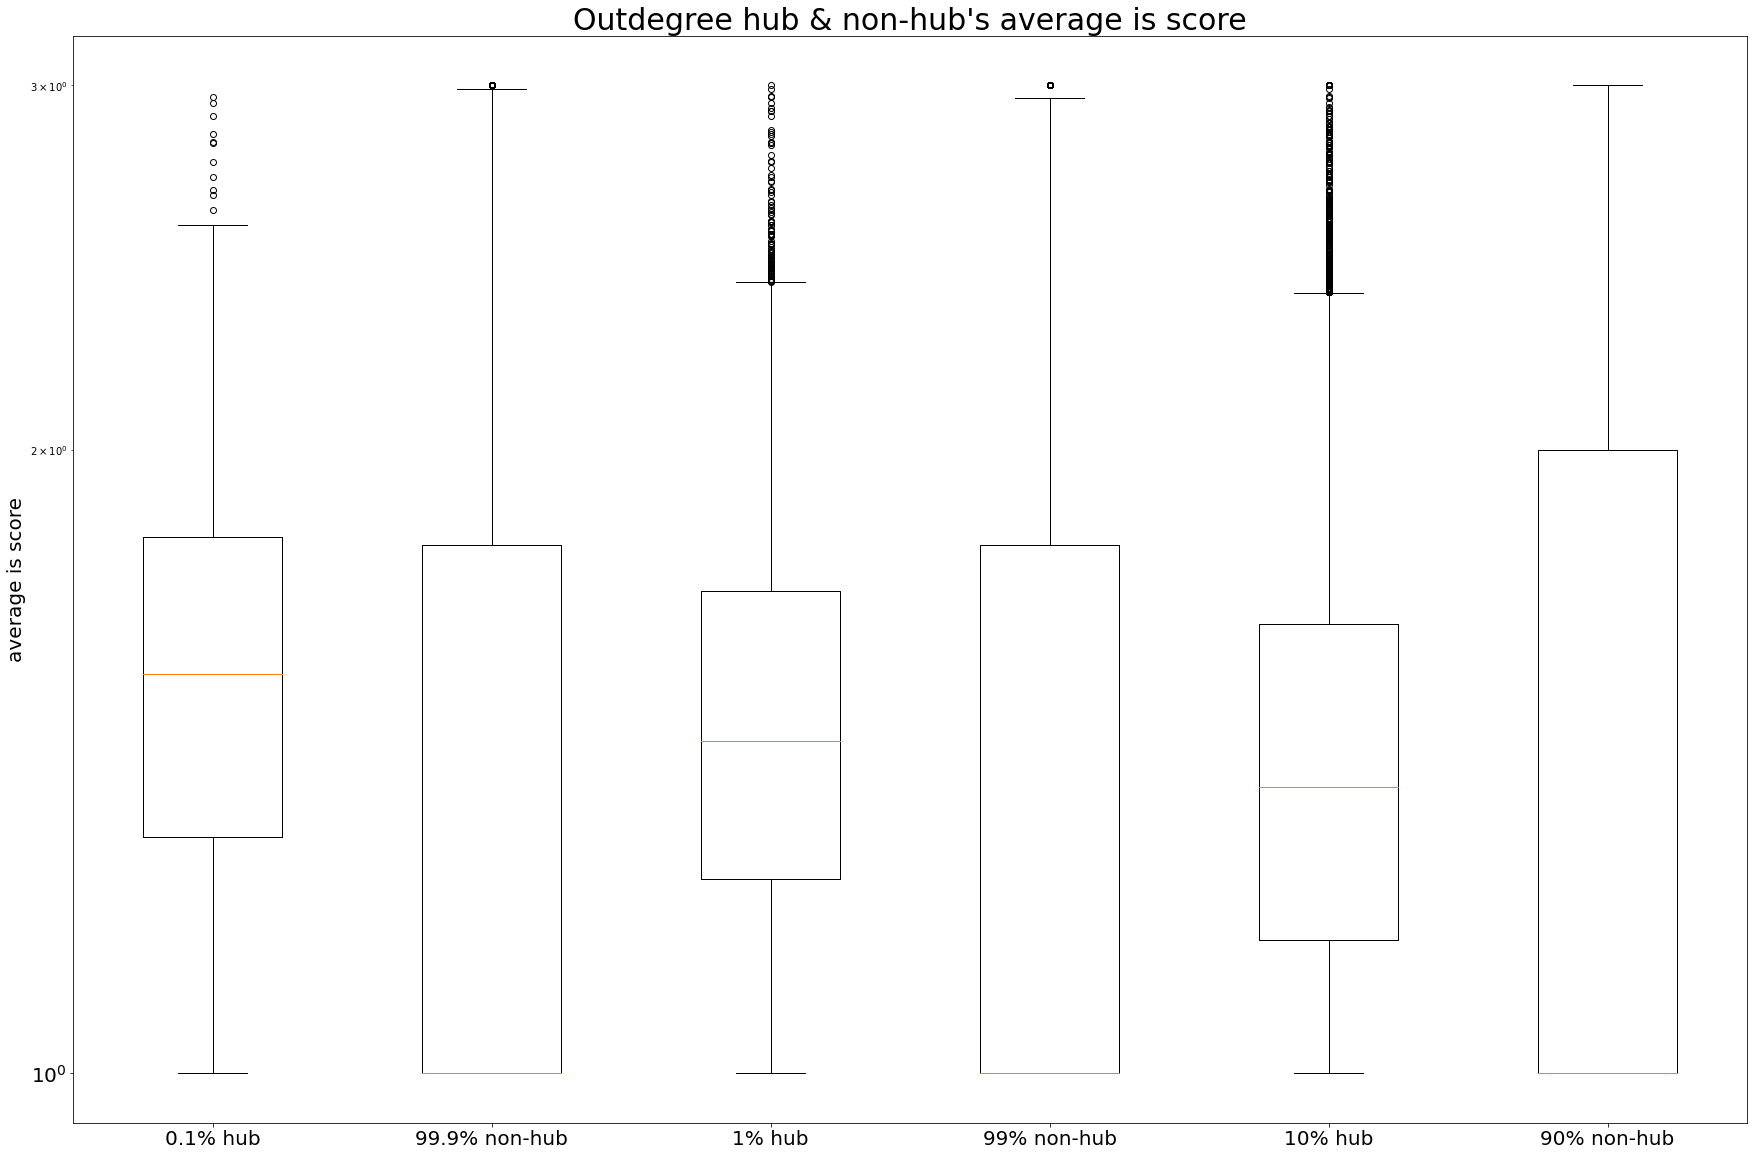

In [115]:
draw_boxplot_for_hub(result_list, "Outdegree hub & non-hub's average is score", xlabel, 'average is score')

In [116]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree = 0.1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 0.1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 10;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 10;')

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['average_es_score'].tolist())))

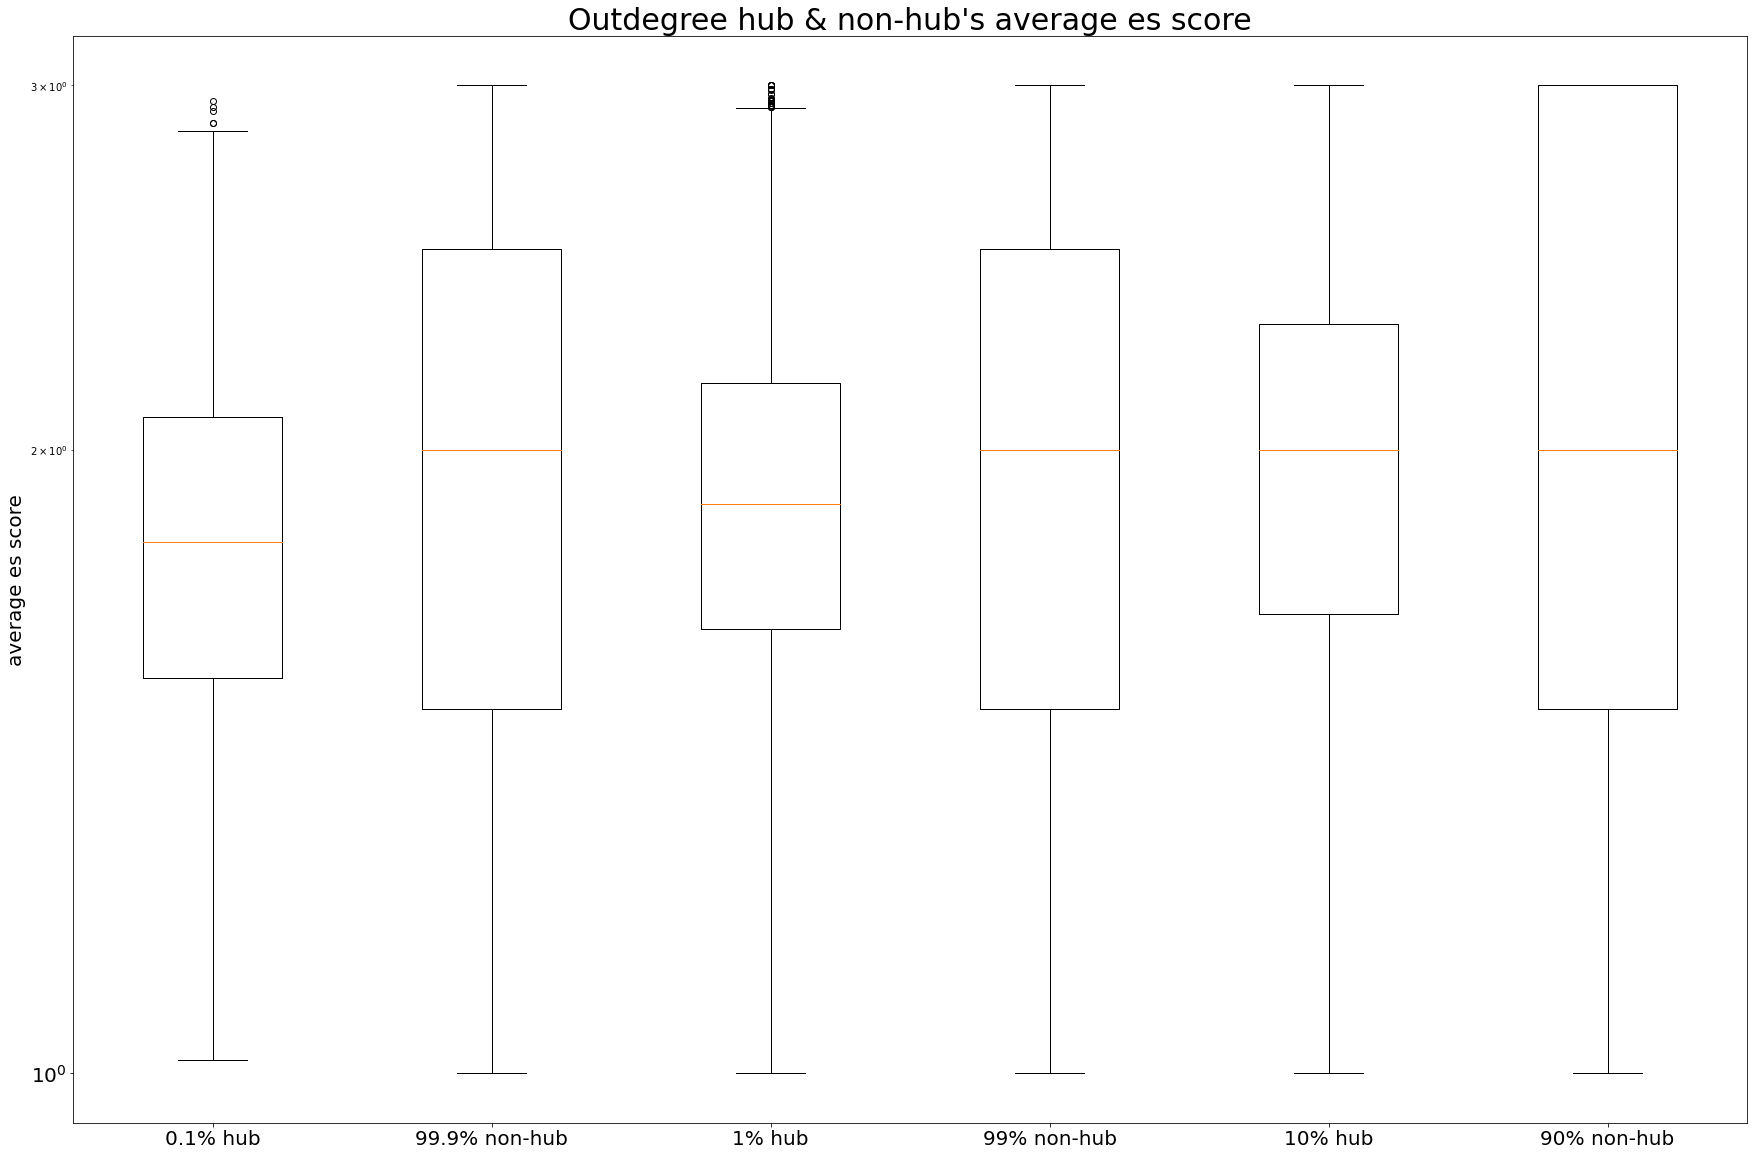

In [117]:
draw_boxplot_for_hub(result_list, "Outdegree hub & non-hub's average es score", xlabel, 'average es score')

In [118]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.average_vote from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree = 0.1;')
sqls.append('select m.average_vote from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 0.1;')
sqls.append('select m.average_vote from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 1;')
sqls.append('select m.average_vote from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 1;')
sqls.append('select m.average_vote from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 10;')
sqls.append('select m.average_vote from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 10;')

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['average_vote'].tolist())))

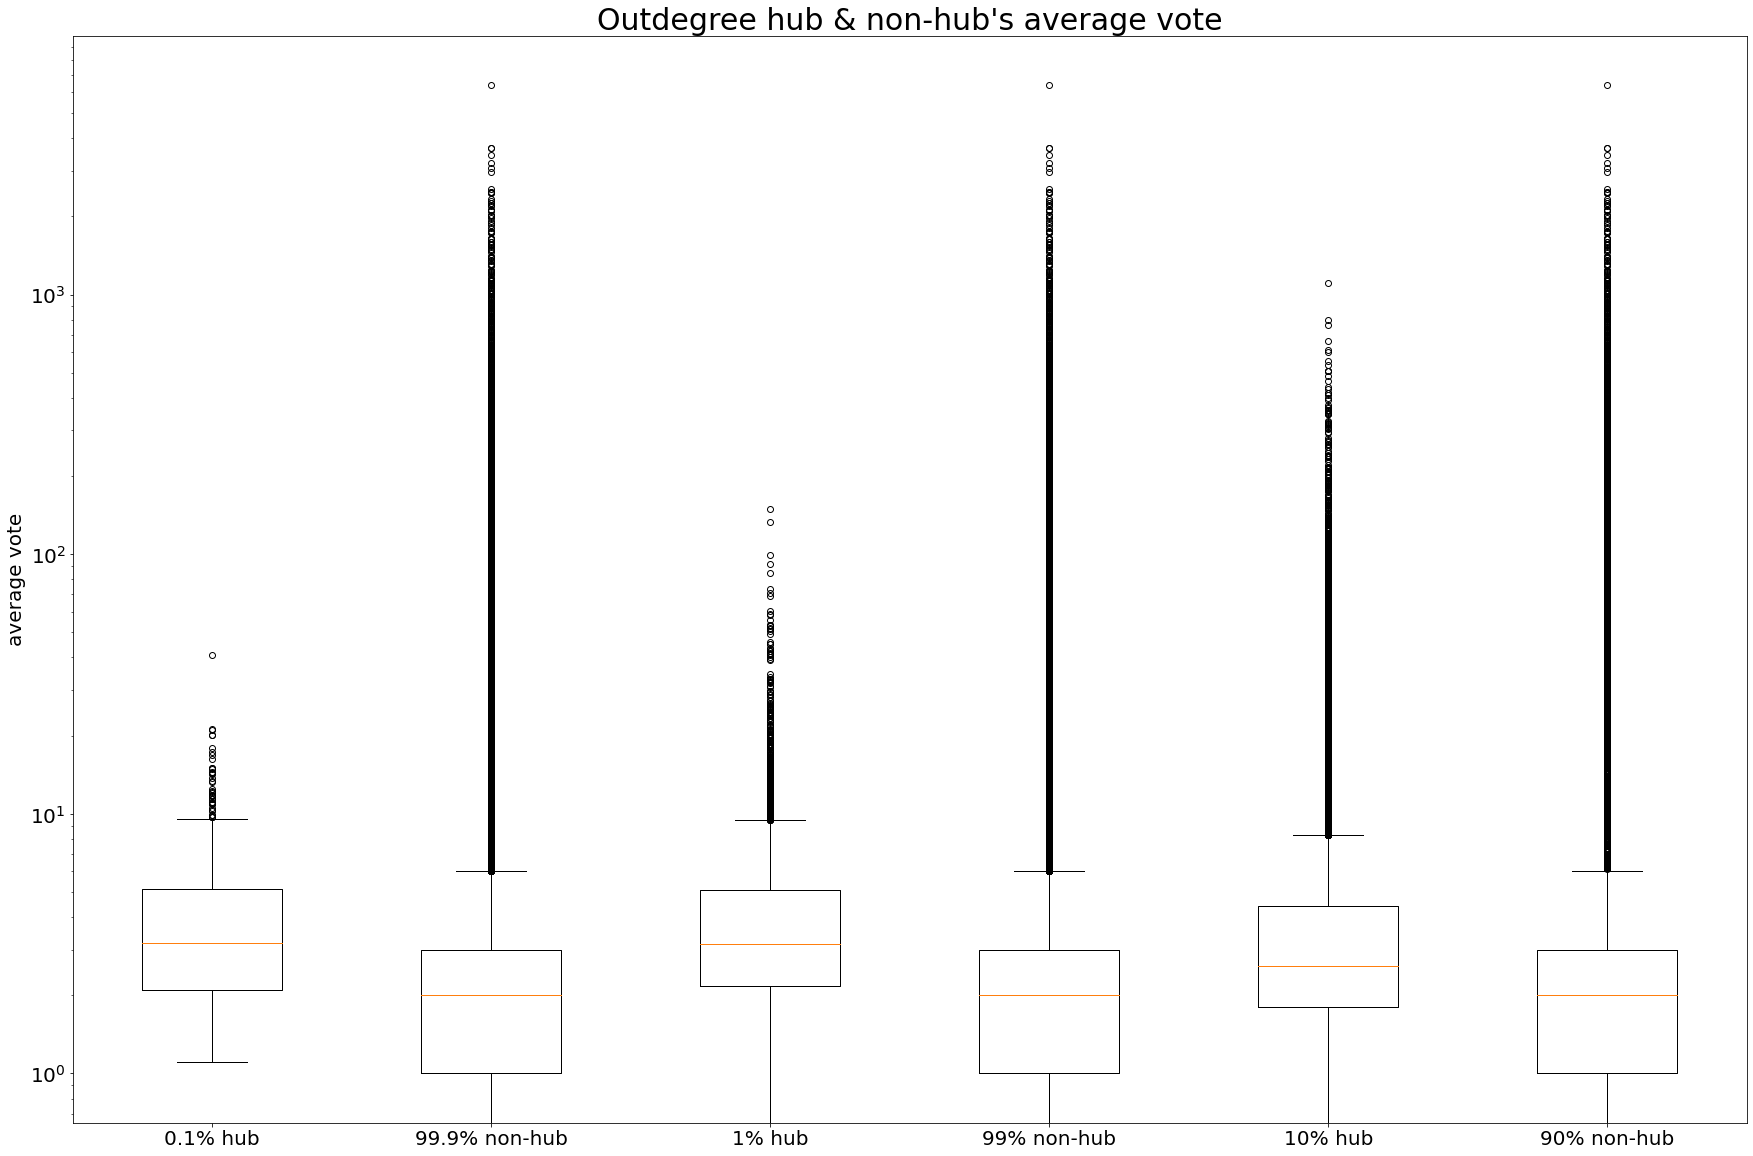

In [119]:
draw_boxplot_for_hub(result_list, "Outdegree hub & non-hub's average vote", xlabel, 'average vote')

In [120]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select outdegree from nodes where top_k_indegree = 0.1;')
sqls.append('select outdegree from nodes where top_k_indegree > 0.1;')
sqls.append('select outdegree from nodes where top_k_indegree <= 1;')
sqls.append('select outdegree from nodes where top_k_indegree > 1;')
sqls.append('select outdegree from nodes where top_k_indegree <= 10;')
sqls.append('select outdegree from nodes where top_k_indegree > 10;')

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    result_list.append(list(np.array(results[i]['outdegree'].tolist())))

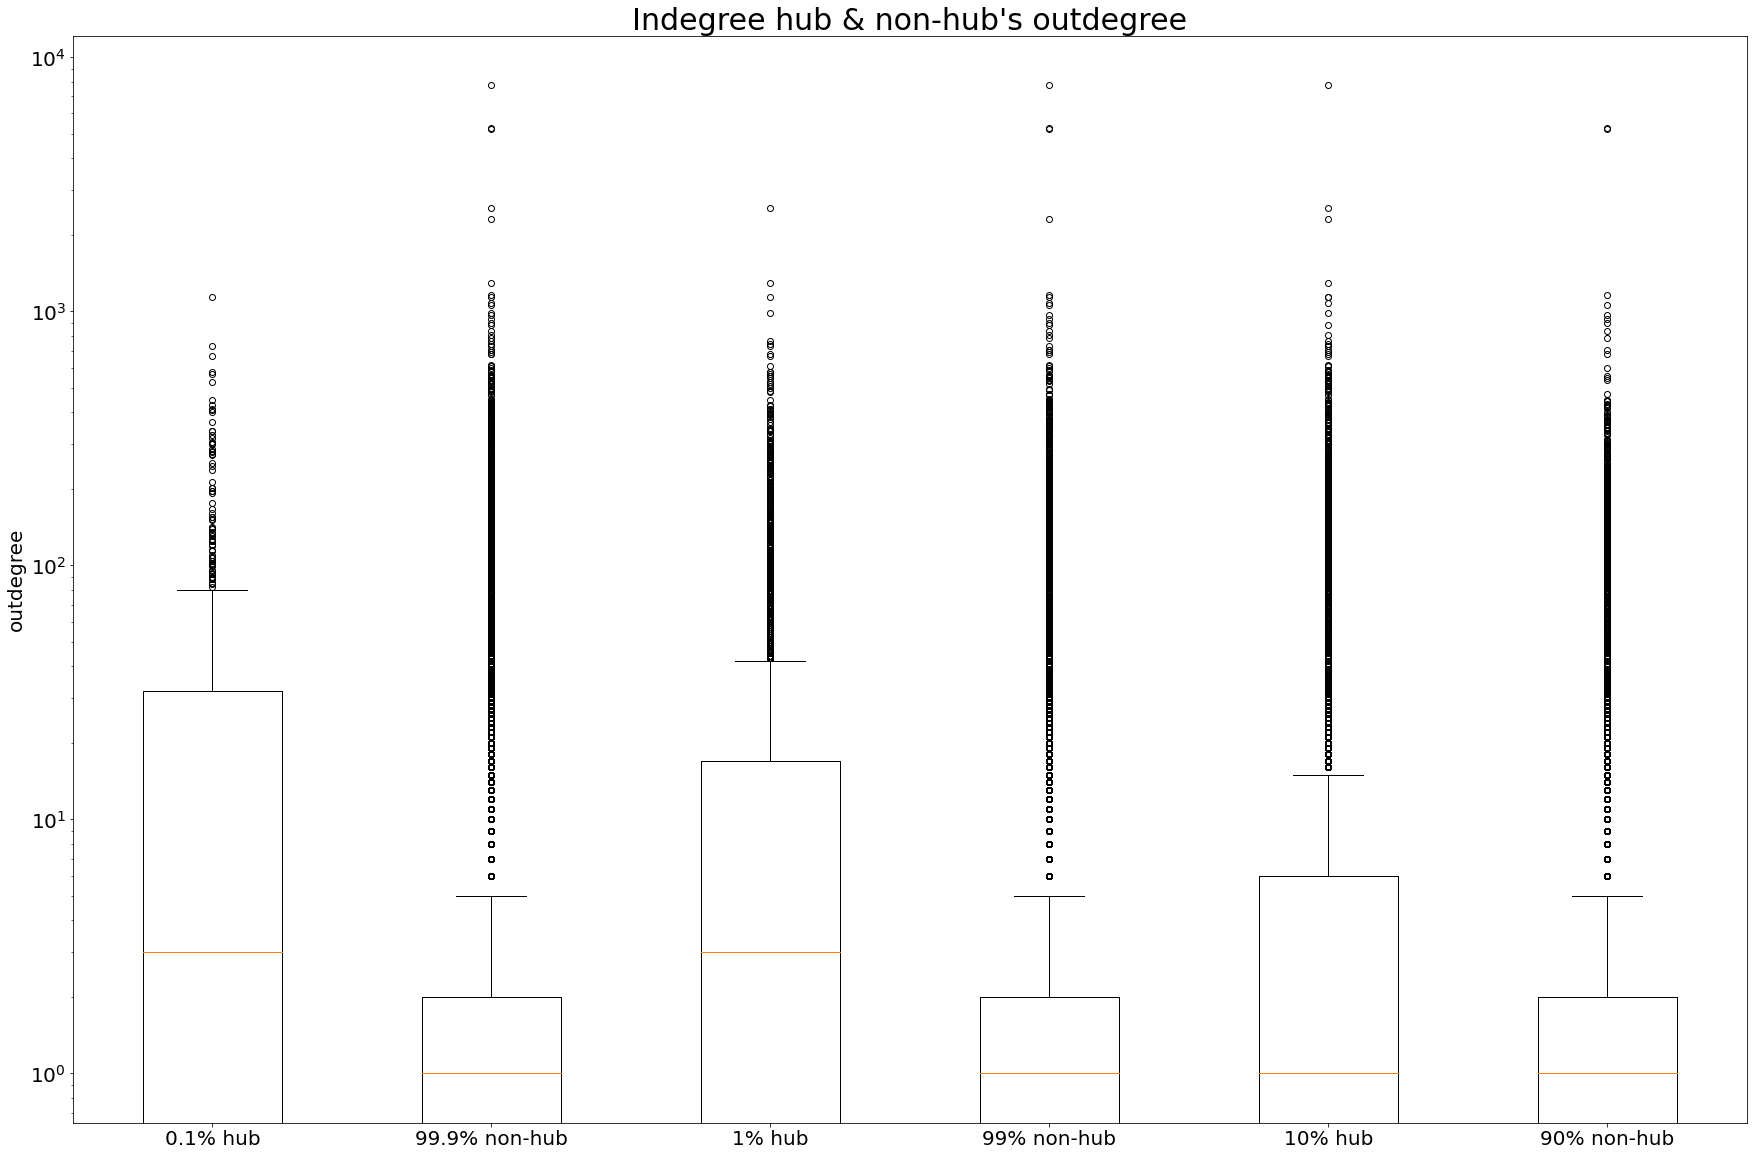

In [121]:
draw_boxplot_for_hub(result_list, "Indegree hub & non-hub's outdegree", xlabel, 'outdegree')

In [122]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select indegree from nodes where top_k_indegree = 0.1;')
sqls.append('select indegree from nodes where top_k_indegree > 0.1;')
sqls.append('select indegree from nodes where top_k_indegree <= 1;')
sqls.append('select indegree from nodes where top_k_indegree > 1;')
sqls.append('select indegree from nodes where top_k_indegree <= 10;')
sqls.append('select indegree from nodes where top_k_indegree > 10;')

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    result_list.append(list(np.array(results[i]['indegree'].tolist())))

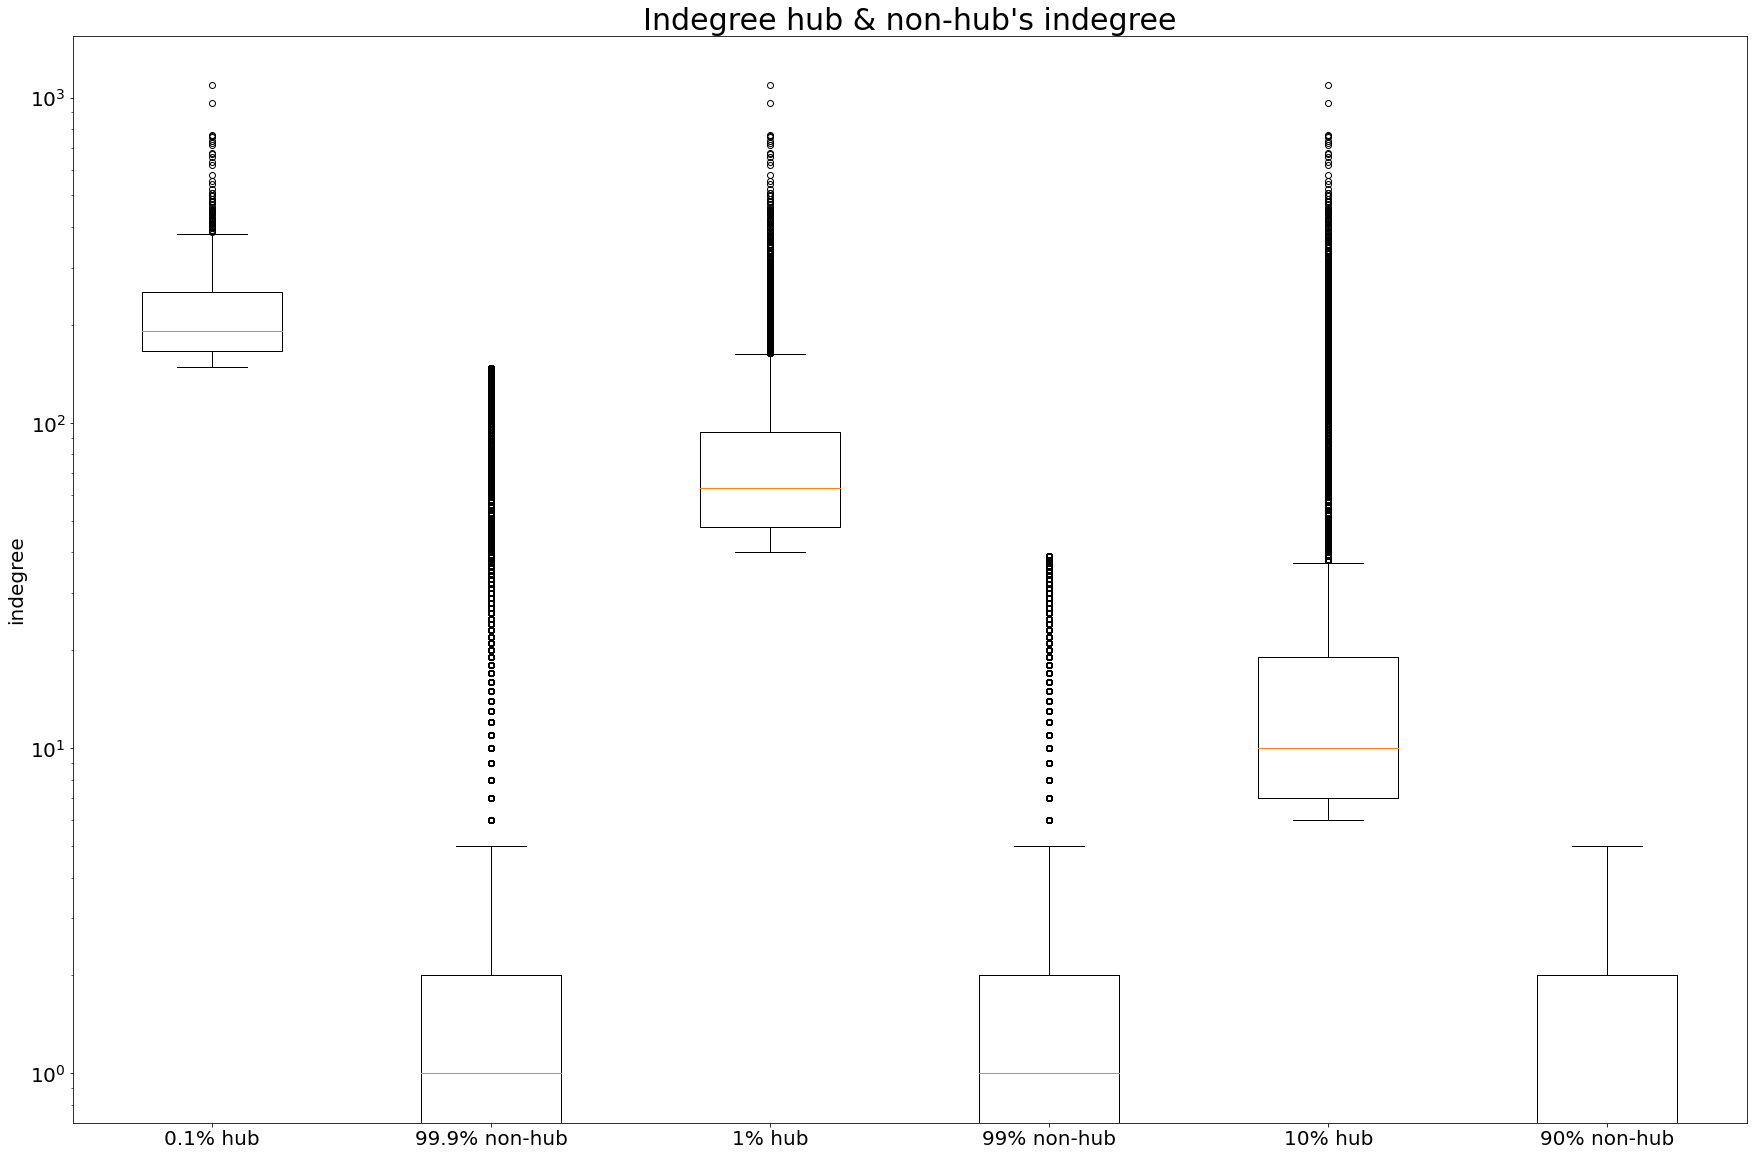

In [123]:
draw_boxplot_for_hub(result_list, "Indegree hub & non-hub's indegree", xlabel, 'indegree')

In [130]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.average_is_score from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree = 0.1 and m.average_is_score is not null;')
sqls.append('select m.average_is_score from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 0.1 and m.average_is_score is not null;')
sqls.append('select m.average_is_score from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 1 and m.average_is_score is not null;')
sqls.append('select m.average_is_score from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 1 and m.average_is_score is not null;')
sqls.append('select m.average_is_score from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 10 and m.average_is_score is not null;')
sqls.append('select m.average_is_score from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 10 and m.average_is_score is not null;')

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['average_is_score'].tolist())))

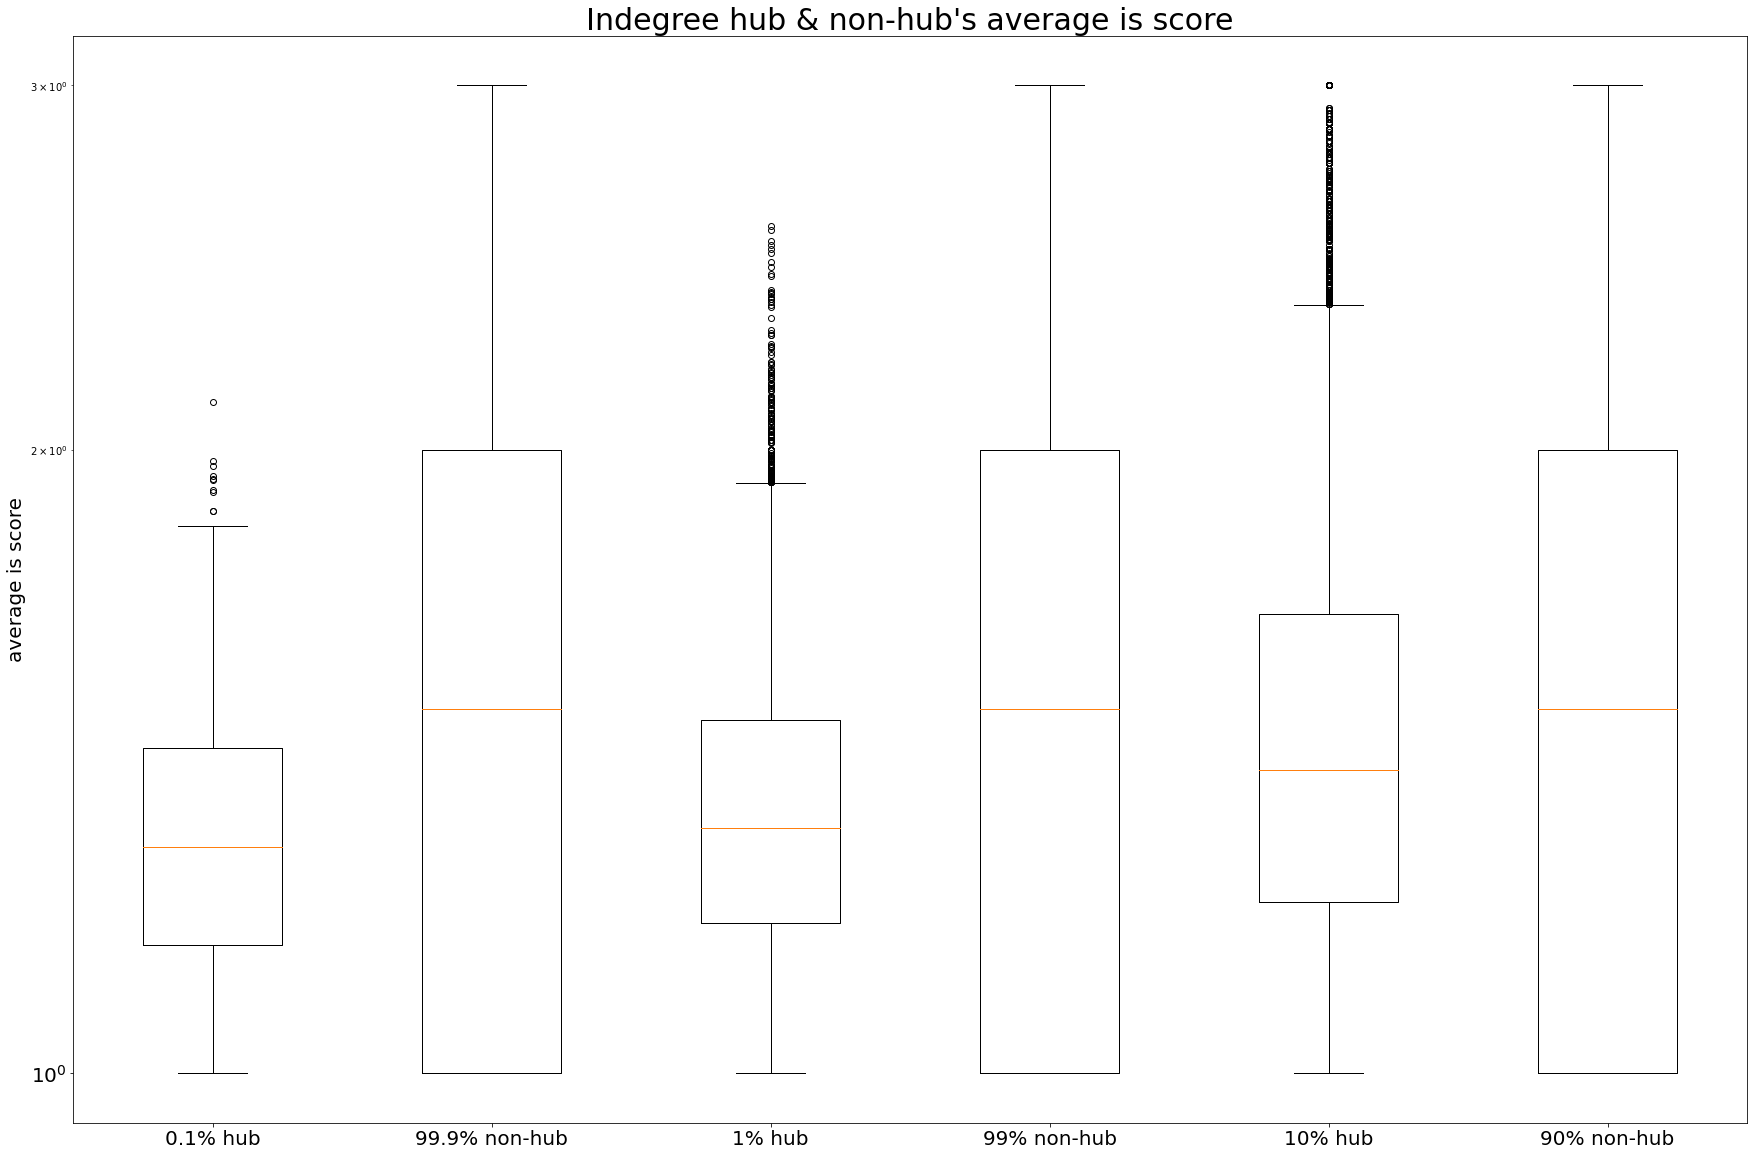

In [131]:
draw_boxplot_for_hub(result_list, "Indegree hub & non-hub's average is score", xlabel, 'average is score')

In [132]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.average_es_score from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree = 0.1 and m.average_es_score is not null;')
sqls.append('select m.average_es_score from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 0.1 and m.average_es_score is not null;')
sqls.append('select m.average_es_score from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 1 and m.average_es_score is not null;')
sqls.append('select m.average_es_score from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 1 and m.average_es_score is not null;')
sqls.append('select m.average_es_score from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 10 and m.average_es_score is not null;')
sqls.append('select m.average_es_score from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 10 and m.average_es_score is not null;')

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['average_es_score'].tolist())))

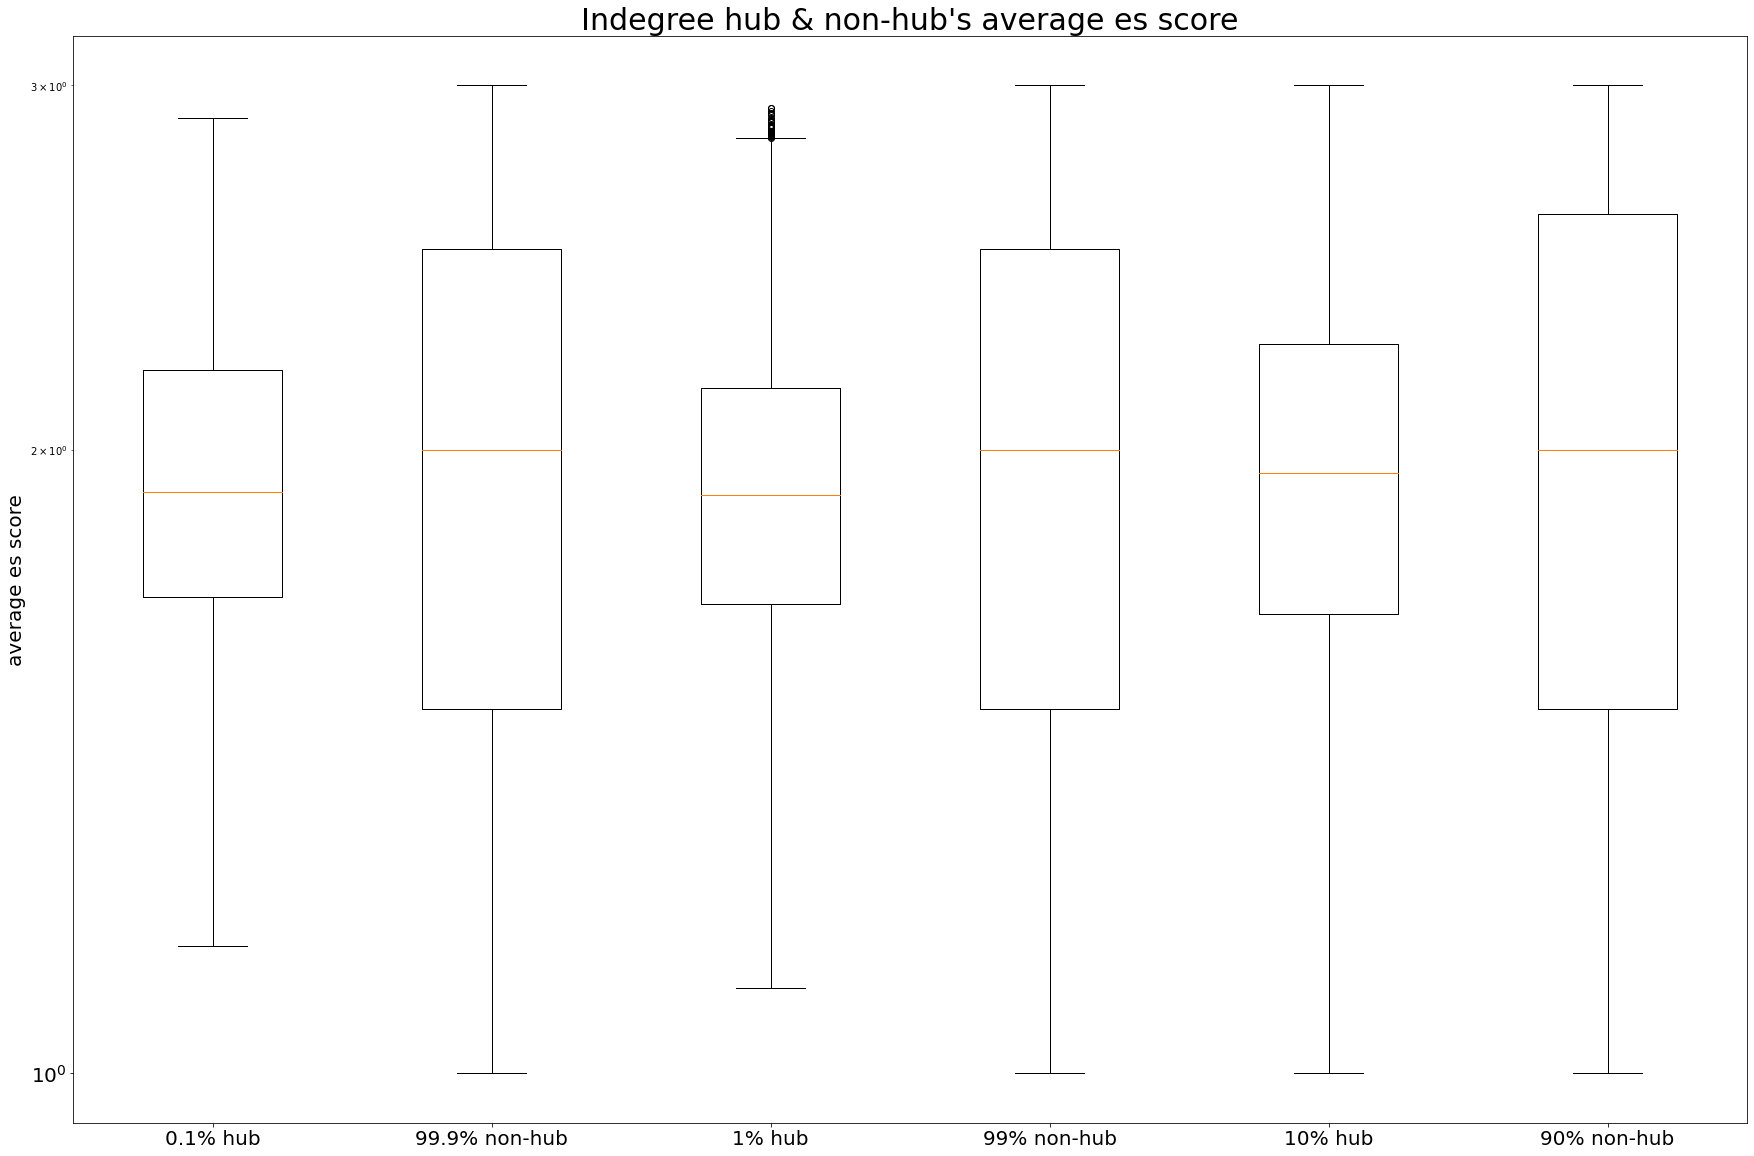

In [133]:
draw_boxplot_for_hub(result_list, "Indegree hub & non-hub's average es score", xlabel, 'average es score')

In [134]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.average_comments_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree = 0.1 and m.average_comments_vote is not null;')
sqls.append('select m.average_comments_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 0.1 and m.average_comments_vote is not null;')
sqls.append('select m.average_comments_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 1 and m.average_comments_vote is not null;')
sqls.append('select m.average_comments_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 1 and m.average_comments_vote is not null;')
sqls.append('select m.average_comments_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 10 and m.average_comments_vote is not null;')
sqls.append('select m.average_comments_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 10 and m.average_comments_vote is not null;')

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['average_comments_vote'].tolist())))

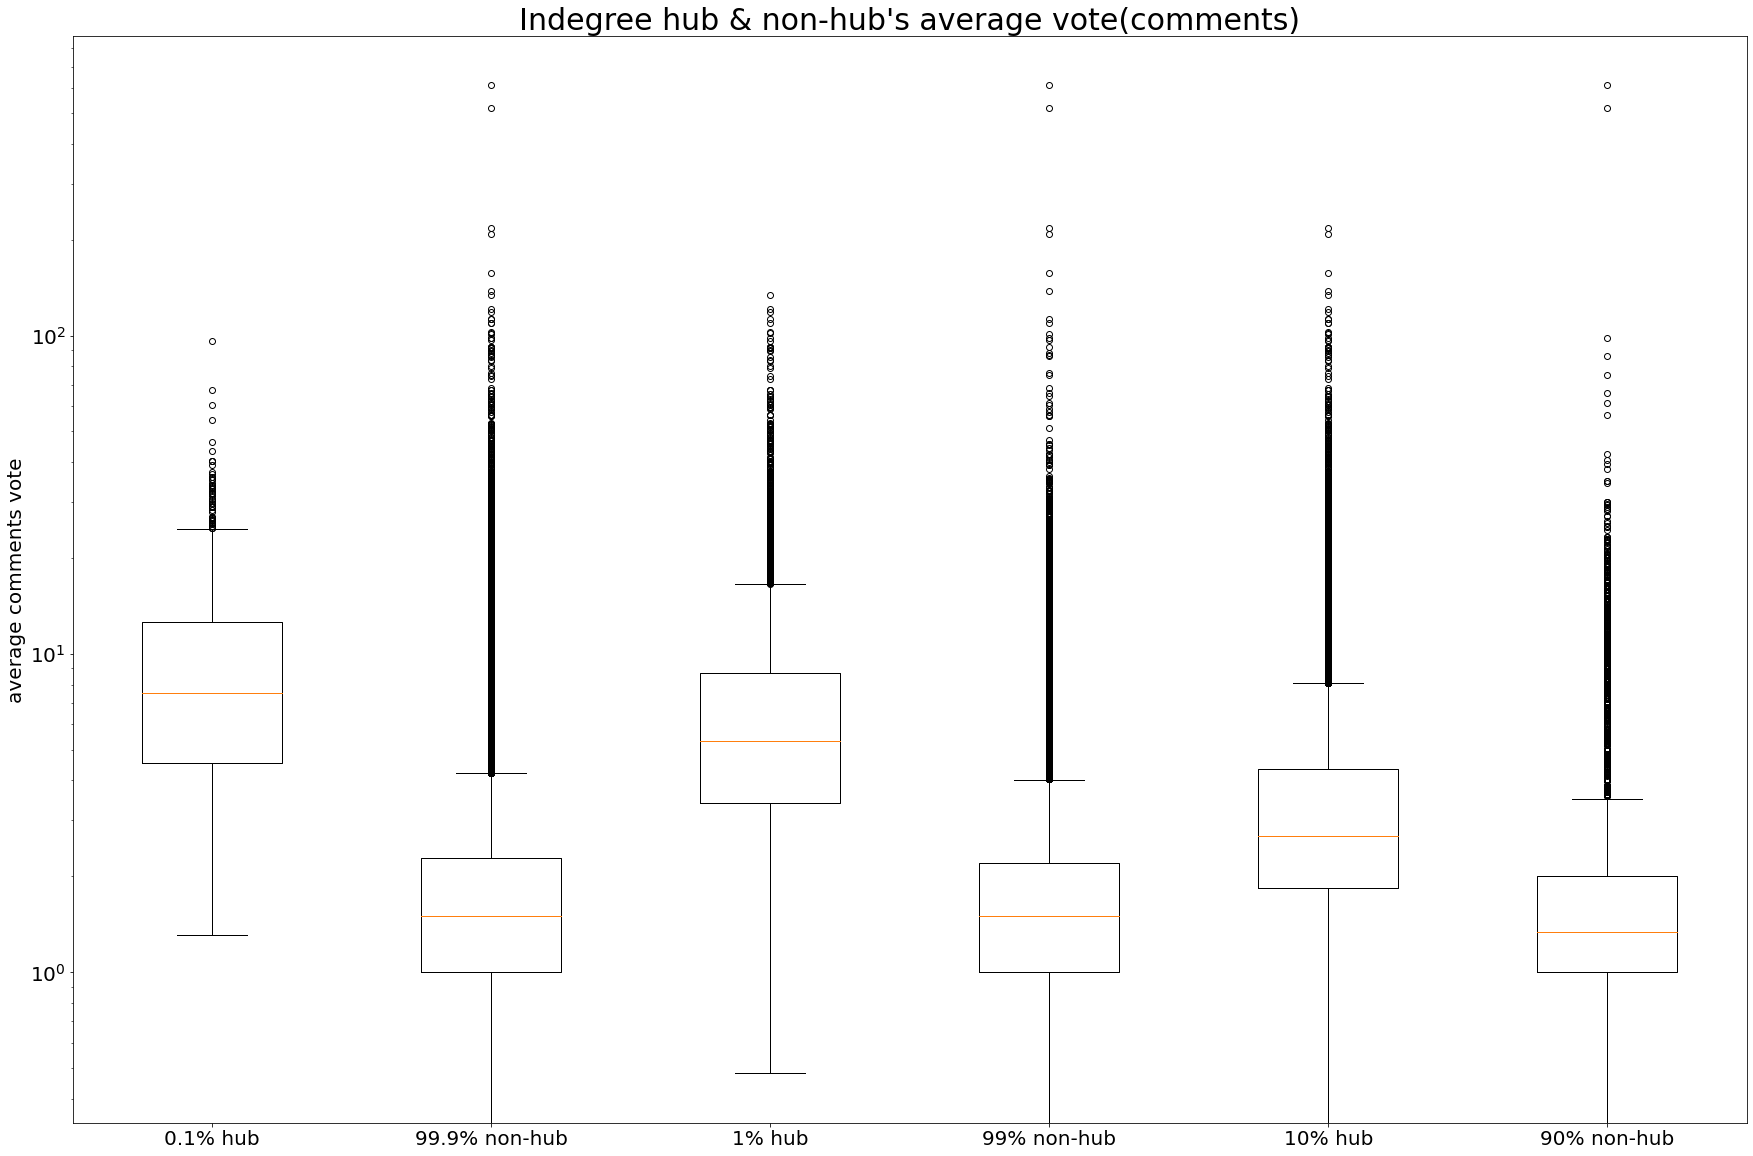

In [136]:
draw_boxplot_for_hub(result_list, "Indegree hub & non-hub's average vote(comments)", xlabel, 'average comments vote')

In [137]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.average_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree = 0.1 and m.average_vote is not null;')
sqls.append('select m.average_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 0.1 and m.average_vote is not null;')
sqls.append('select m.average_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 1 and m.average_vote is not null;')
sqls.append('select m.average_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 1 and m.average_vote is not null;')
sqls.append('select m.average_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 10 and m.average_vote is not null;')
sqls.append('select m.average_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 10 and m.average_vote is not null;')

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['average_vote'].tolist())))

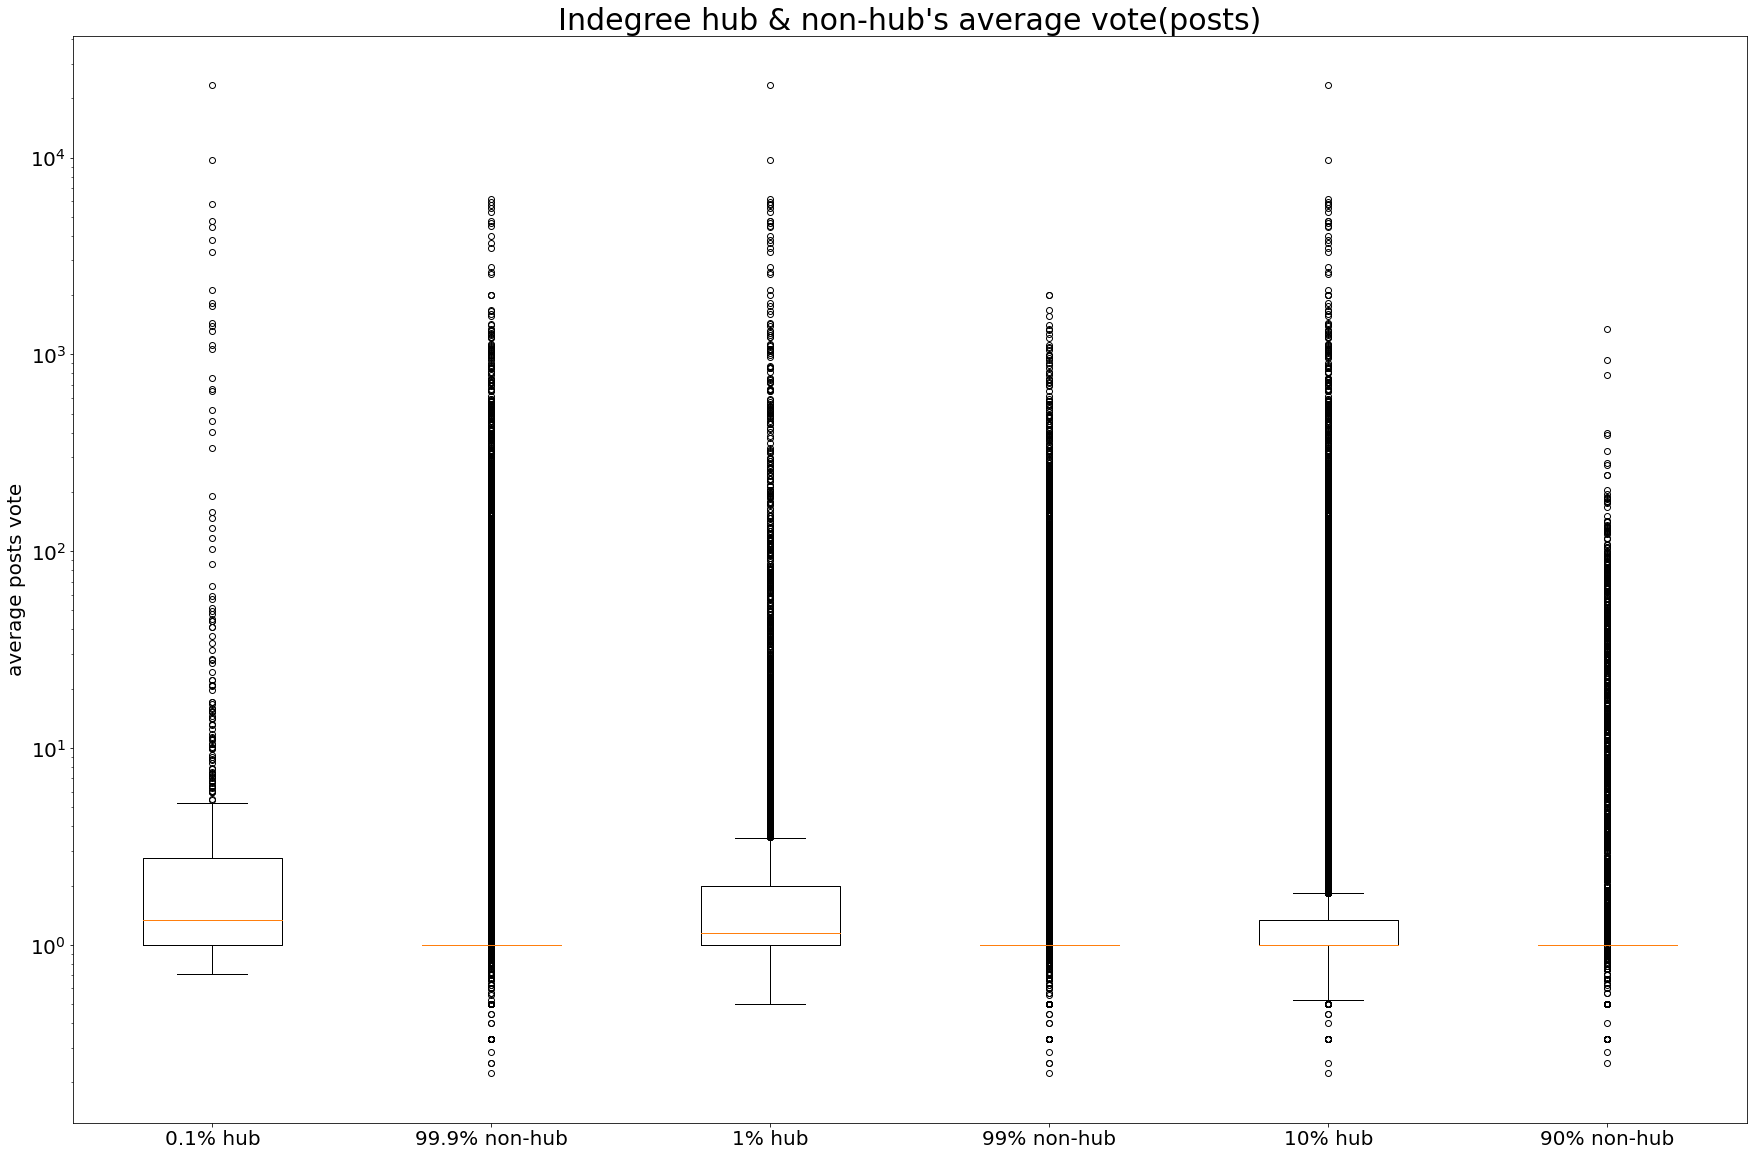

In [138]:
draw_boxplot_for_hub(result_list, "Indegree hub & non-hub's average vote(posts)", xlabel, 'average posts vote')

In [139]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.posts_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree = 0.1 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 0.1 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 1 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 1 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 10 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 10 and m.posts_similarity is not null;')

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['posts_similarity'].tolist())))

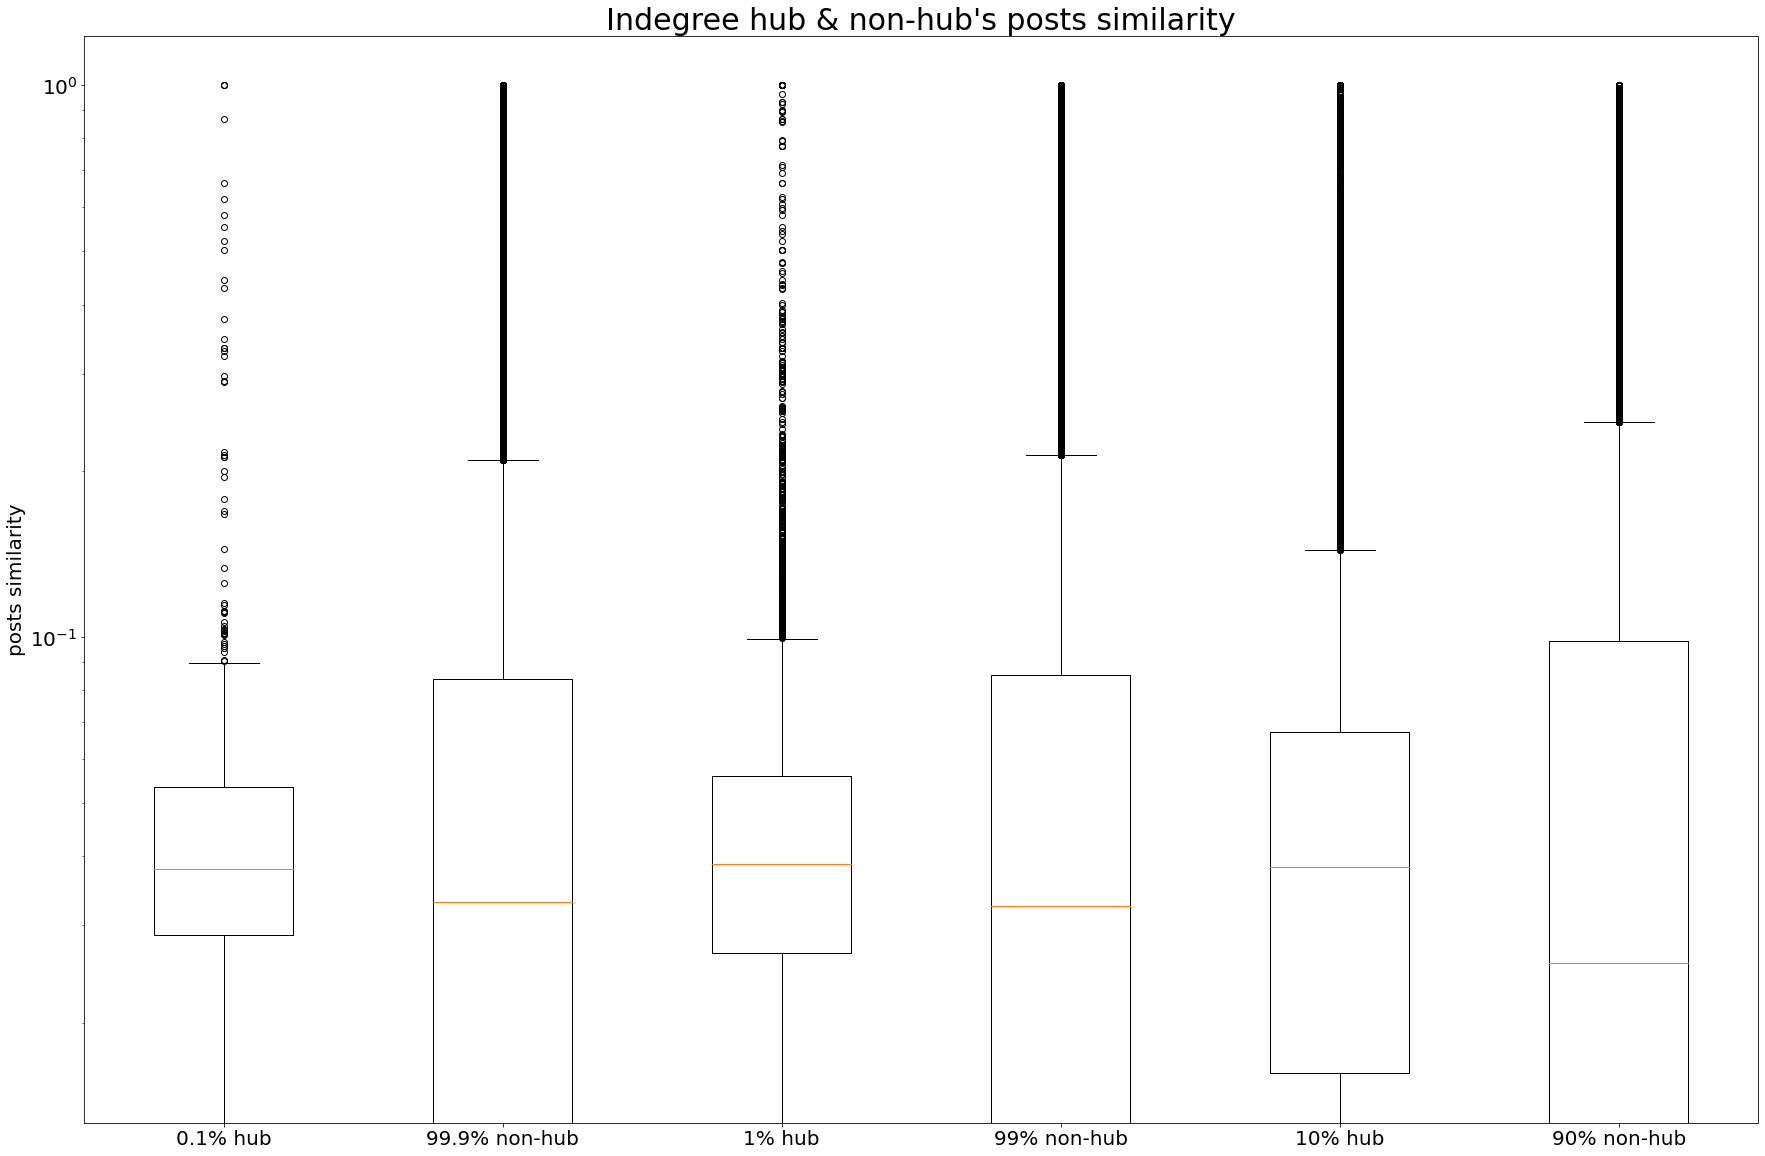

In [140]:
draw_boxplot_for_hub(result_list, "Indegree hub & non-hub's posts similarity", xlabel, 'posts similarity')

In [141]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(6):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.comments_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree = 0.1 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 0.1 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 1 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 1 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 10 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 10 and m.comments_similarity is not null;')

for i in range(6):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(6):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['comments_similarity'].tolist())))

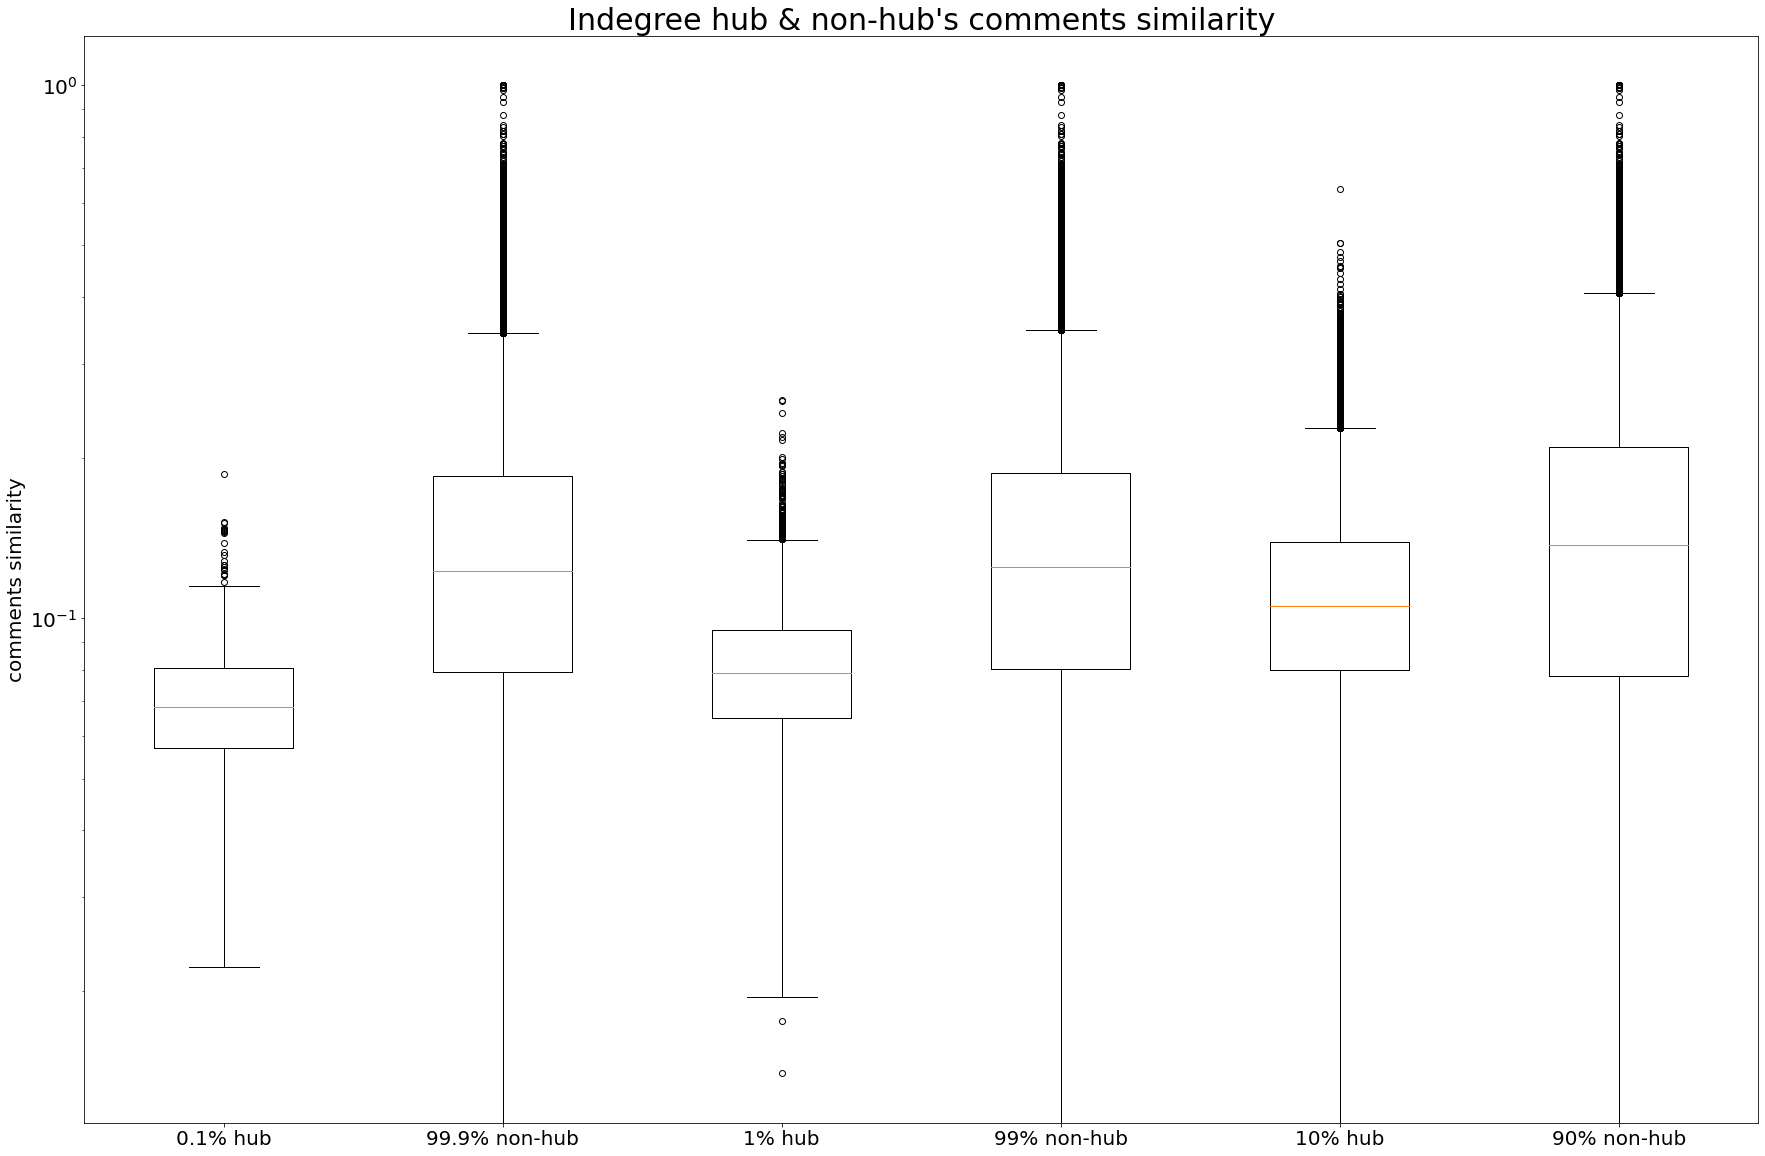

In [142]:
draw_boxplot_for_hub(result_list, "Indegree hub & non-hub's comments similarity", xlabel, 'comments similarity')